<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_2551-2600.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1221]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [1222]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit ERROR: [04:54:27] SMILES Parse Error: syntax error while parsing: COc1ccc(/C=C2\CCCN=C2c2cccnc2)c(OC)c1]
RDKit ERROR: [04:54:27] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(/C=C2\CCCN=C2c2cccnc2)c(OC)c1]' for input: 'COc1ccc(/C=C2\CCCN=C2c2cccnc2)c(OC)c1]'


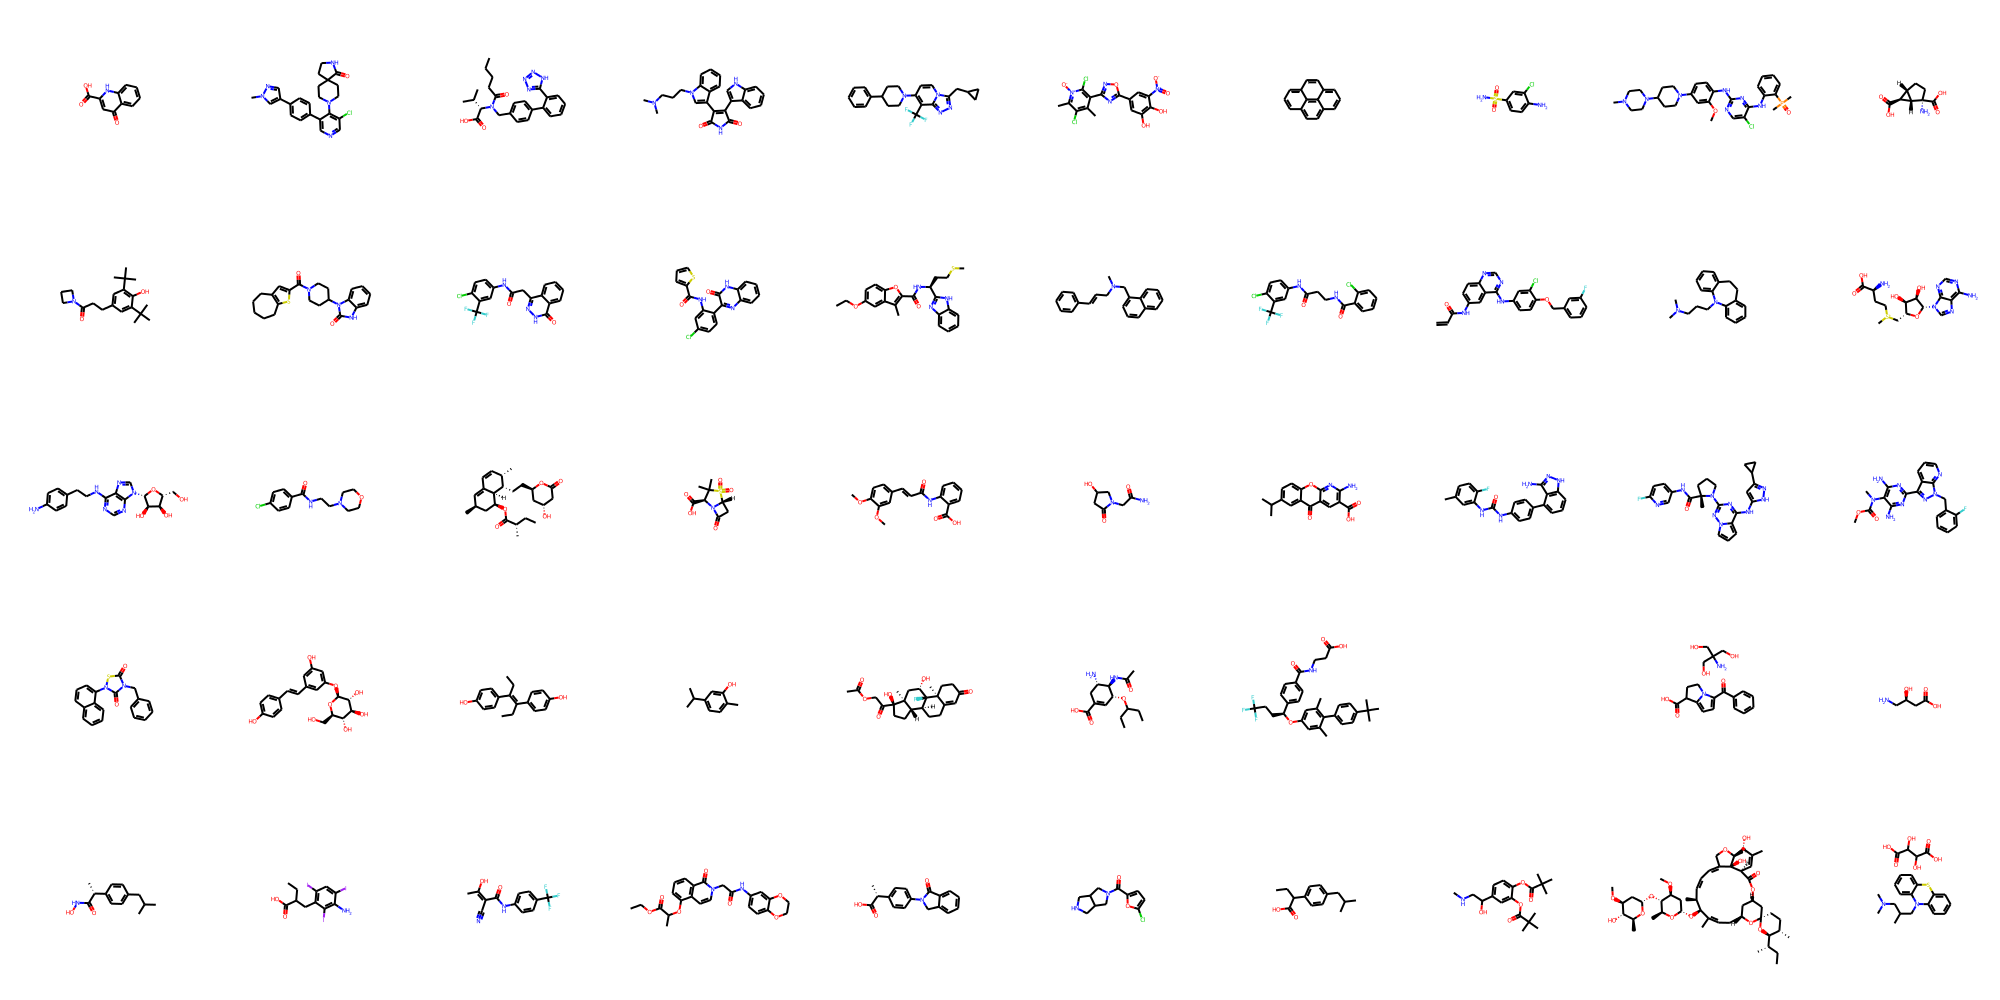

In [1223]:
smiles_list = [

'O=C(O)c1cc(=O)c2ccccc2[nH]1',
'Cn1cc(-c2ccc(-c3cncc(Cl)c3N3CCC4(CCNC4=O)CC3)cc2)cn1',
'CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nnn[nH]2)cc1)[C@H](C(=O)O)C(C)C',
'CN(C)CCCn1cc(C2=C(c3c[nH]c4ccccc34)C(=O)NC2=O)c2ccccc21',
'FC(F)(F)c1c(N2CCC(c3ccccc3)CC2)ccn2c(CC3CC3)nnc12',
'Cc1c(Cl)c(C)[n+]([O-])c(Cl)c1-c1noc(-c2cc(O)c(O)c([N+](=O)[O-])c2)n1',
'c1cc2ccc3cccc4ccc(c1)c2c34',
'Nc1ccc(S(N)(=O)=O)cc1Cl',
'COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(Nc2ccccc2P(C)(C)=O)n1',
'N[C@@]1(C(=O)O)CC[C@H]2[C@H](C(=O)O)[C@H]21',
'CC(C)(C)c1cc(CCC(=O)N2CCC2)cc(C(C)(C)C)c1O',
'O=C(c1cc2c(s1)CCCCC2)N1CCC(n2c(=O)[nH]c3ccccc32)CC1',
'O=C(Cc1n[nH]c(=O)c2ccccc12)Nc1ccc(Cl)c(C(F)(F)F)c1',
'O=C(Nc1cc(Cl)ccc1-c1nc2ccccc2[nH]c1=O)c1cccs1',
'CCOc1ccc2oc(C(=O)N[C@@H](CCSC)c3nc4ccccc4[nH]3)c(C)c2c1',
'CN(C/C=C/c1ccccc1)Cc1cccc2ccccc12',
'O=C(CCNC(=O)c1ccccc1Cl)Nc1ccc(Cl)c(C(F)(F)F)c1',
'C=CC(=O)Nc1ccc2ncnc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)c2c1',
'CN(C)CCCN1c2ccccc2CCc2ccccc21',
'C[S+](CC[C@H](N)C(=O)O)C[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1O',
'Nc1ccc(CCNc2ncnc3c2ncn3[C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)cc1',
'O=C(NCCN1CCOCC1)c1ccc(Cl)cc1',
'CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@H](CC[C@@H]3C[C@@H](O)CC(=O)O3)[C@H]21',
'CC1(C)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(=O)=O',
'COc1ccc(/C=C/C(=O)Nc2ccccc2C(=O)O)cc1OC',
'NC(=O)CN1CC(O)CC1=O',
'CC(C)c1ccc2oc3nc(N)c(C(=O)O)cc3c(=O)c2c1',
'Cc1ccc(F)c(NC(=O)Nc2ccc(-c3cccc4[nH]nc(N)c34)cc2)c1',
'C[C@@]1(C(=O)Nc2ccc(F)nc2)CCCN1c1nc(Nc2cc(C3CC3)n[nH]2)c2cccn2n1',
'COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23)nc1N',
'O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1',
'OC[C@H]1O[C@@H](Oc2cc(O)cc(/C=C/c3ccc(O)cc3)c2)[C@H](O)[C@@H](O)[C@@H]1O',
'CC/C(=C(/CC)c1ccc(O)cc1)c1ccc(O)cc1',
'Cc1ccc(C(C)C)cc1O',
'CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@@]3(F)[C@@H](O)C[C@@]21C',
'CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](N)[C@H]1NC(C)=O',
'Cc1cc(O[C@@H](CCC(F)(F)F)c2ccc(C(=O)NCCC(=O)O)cc2)cc(C)c1-c1ccc(C(C)(C)C)cc1',
'COc1ccc(/C=C2\CCCN=C2c2cccnc2)c(OC)c1]',
'NC(CO)(CO)CO.O=C(c1ccccc1)c1ccc2n1CCC2C(=O)O',
'NC[C@@H](O)CC(=O)O',
'CC(C)Cc1ccc([C@@H](C)C(=O)NO)cc1',
'CCC(Cc1c(I)cc(I)c(N)c1I)C(=O)O',
'C/C(O)=C(\C#N)C(=O)Nc1ccc(C(F)(F)F)cc1',
'CCOC(=O)C(C)Oc1cccc2c(=O)n(CC(=O)Nc3ccc4c(c3)OCCO4)ccc12',
'C[C@@H](C(=O)O)c1ccc(N2Cc3ccccc3C2=O)cc1',
'O=C(c1ccc(Cl)o1)N1CC2CNCC2C1',
'CCC(C(=O)O)c1ccc(CC(C)C)cc1',
'CNCC(O)c1ccc(OC(=O)C(C)(C)C)c(OC(=O)C(C)(C)C)c1',
'CC[C@H](C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@@H](C/C=C(\C)[C@@H](O[C@H]3C[C@H](OC)[C@@H](O[C@H]4C[C@H](OC)[C@@H](O)[C@H](C)O4)[C@H](C)O3)[C@@H](C)/C=C/C=C3\CO[C@@H]4[C@H](O)C(C)=C[C@@H](C(=O)O1)[C@]34O)O2',
'CC(CN(C)C)CN1c2ccccc2Sc2ccccc21.O=C(O)C(O)C(O)C(=O)O',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



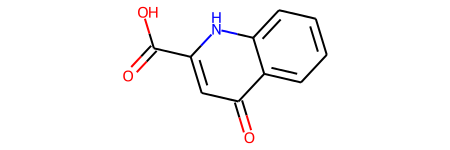

In [1224]:
M1 = mol_list [0]
M1

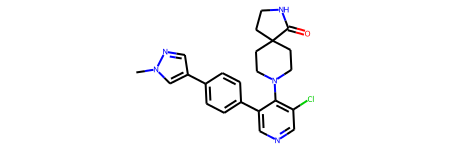

In [1225]:
M2 = mol_list [1]
M2

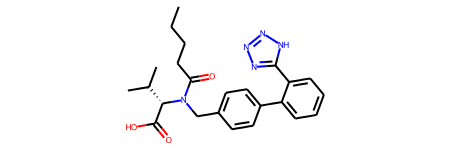

In [1226]:
M3 = mol_list [2]
M3

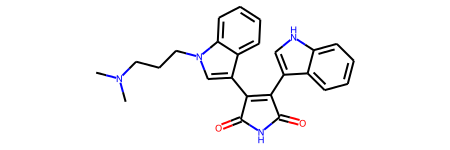

In [1227]:
M4 = mol_list [3]
M4

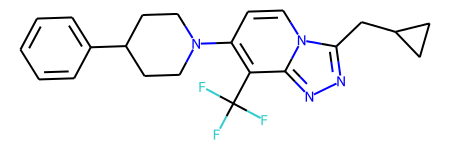

In [1228]:
M5 = mol_list [4]
M5

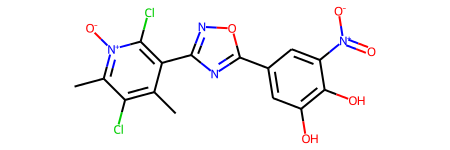

In [1229]:
M6 = mol_list [5]
M6

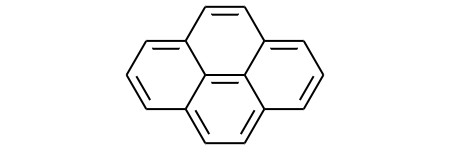

In [1230]:
M7 = mol_list [6]
M7

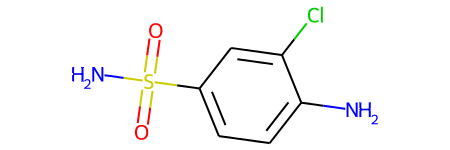

In [1231]:
M8 = mol_list [7]
M8

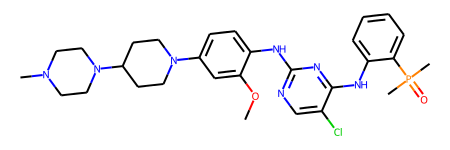

In [1232]:
M9 = mol_list [8]
M9

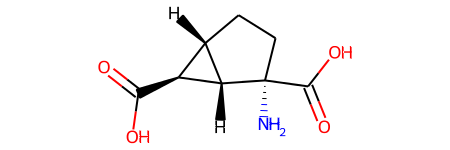

In [1233]:
M10 = mol_list [9]
M10

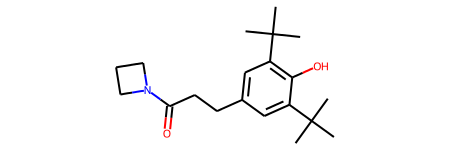

In [1234]:
M11 = mol_list [10]
M11

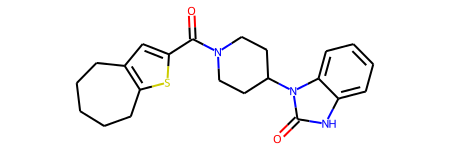

In [1235]:
M12 = mol_list [11]
M12

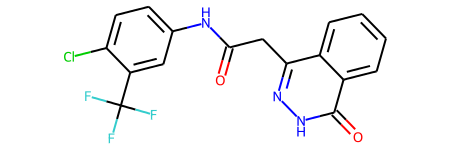

In [1236]:
M13 = mol_list [12]
M13

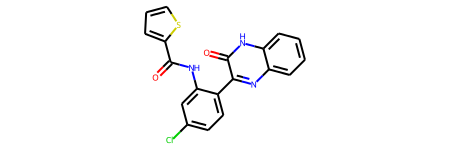

In [1237]:
M14 = mol_list [13]
M14

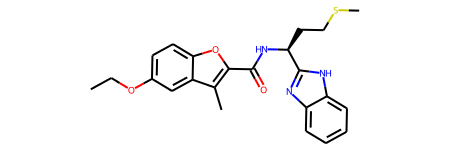

In [1238]:
M15 = mol_list [14]
M15

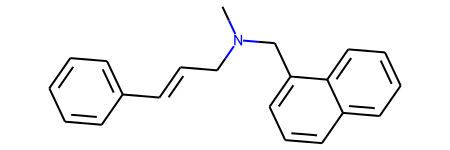

In [1239]:
M16 = mol_list [15]
M16

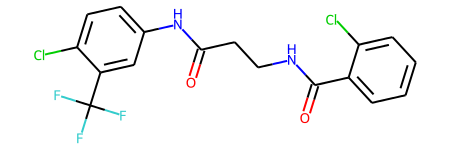

In [1240]:
M17 = mol_list [16]
M17

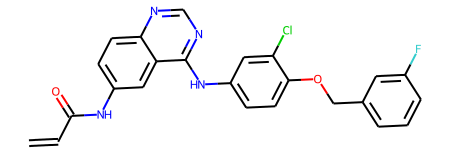

In [1241]:
M18 = mol_list [17]
M18

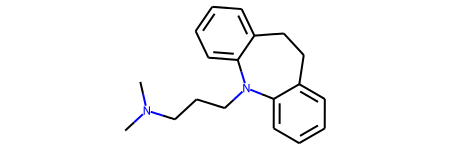

In [1242]:
M19 = mol_list [18]
M19

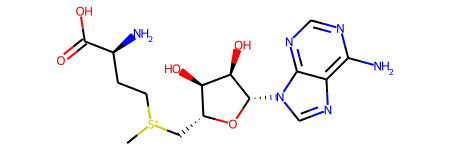

In [1243]:
M20 = mol_list [19]
M20

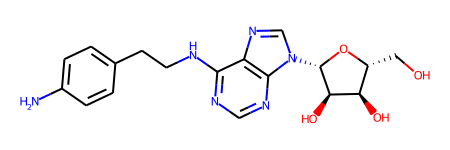

In [1244]:
M21 = mol_list [20]
M21

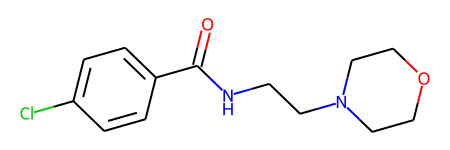

In [1245]:
M22 = mol_list [21]
M22

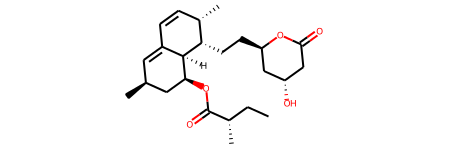

In [1246]:
M23 = mol_list [22]
M23

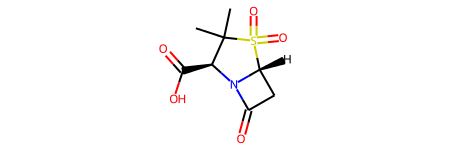

In [1247]:
M24 = mol_list [23]
M24

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


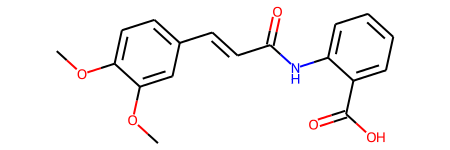

In [1248]:
M25 = mol_list [24]
M25

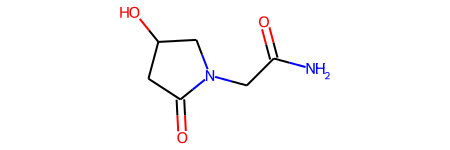

In [1249]:
M26 = mol_list [25]
M26

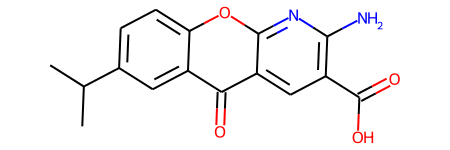

In [1250]:
M27 = mol_list [26]
M27

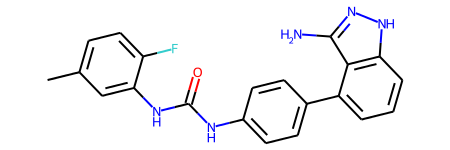

In [1251]:
M28 = mol_list [27]
M28

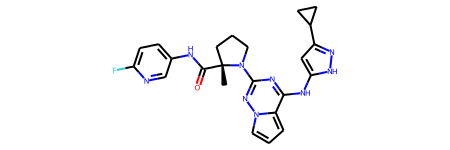

In [1252]:
M29 = mol_list [28]
M29

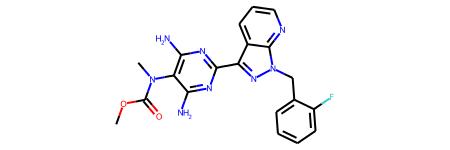

In [1253]:
M30 = mol_list [29]
M30

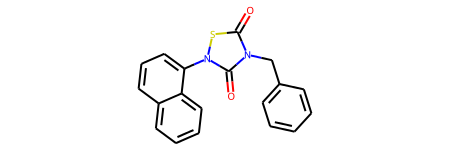

In [1254]:
M31 = mol_list [30]
M31

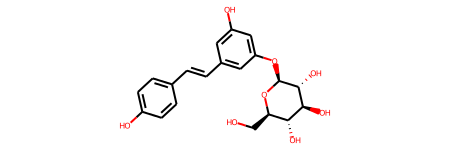

In [1255]:
M32 = mol_list [31]
M32

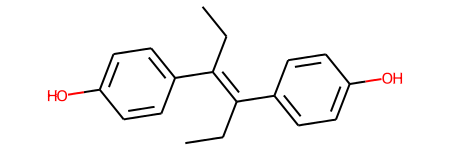

In [1256]:
M33 = mol_list [32]
M33

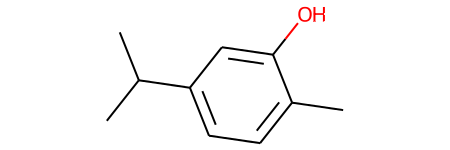

In [1257]:
M34 = mol_list [33]
M34

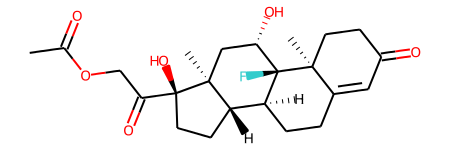

In [1258]:
M35 = mol_list [34]
M35

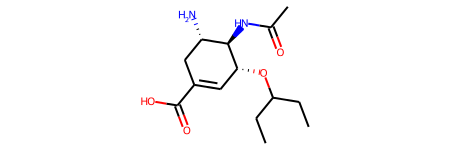

In [1259]:
M36 = mol_list [35]
M36

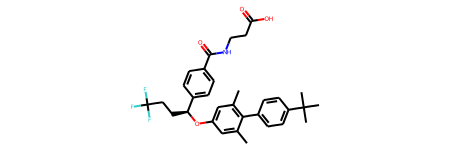

In [1260]:
M37= mol_list [36]
M37

In [1261]:
M38= mol_list [37]
M38

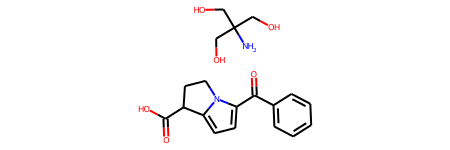

In [1262]:
M39= mol_list [38]
M39

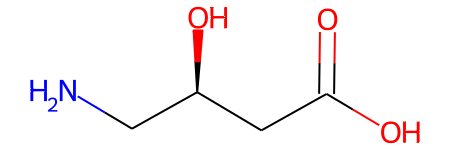

In [1263]:
M40= mol_list [39]
M40

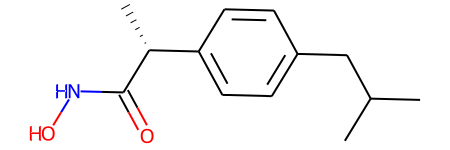

In [1264]:
M41= mol_list [40]
M41

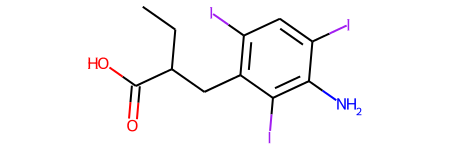

In [1265]:
M42= mol_list [41]
M42

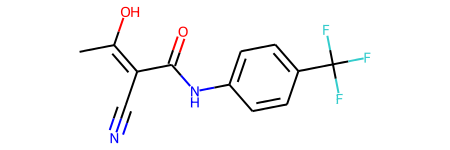

In [1266]:
M43= mol_list [42]
M43

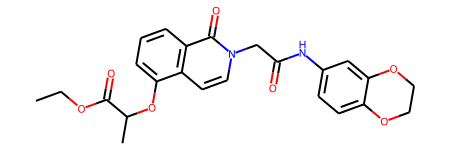

In [1267]:
M44= mol_list [43]
M44

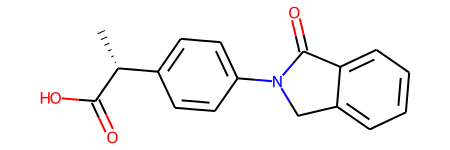

In [1268]:
M45= mol_list [44]
M45

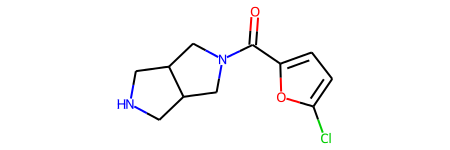

In [1269]:
M46= mol_list [45]
M46

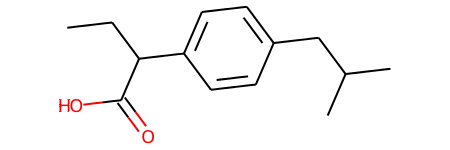

In [1270]:
M47= mol_list [46]
M47

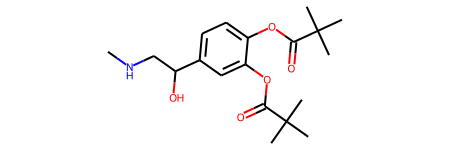

In [1271]:
M48= mol_list [47]
M48

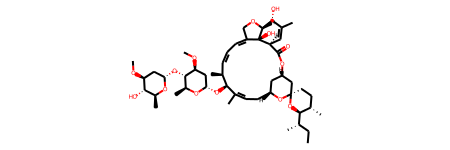

In [1272]:
M49= mol_list [48]
M49

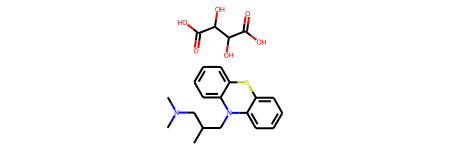

In [1273]:
M50= mol_list [49]
M50

In [1274]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[64,
 68,
 90,
 119,
 143,
 175,
 209,
 275,
 314,
 333,
 356,
 365,
 389,
 440,
 456,
 549,
 607,
 650,
 721,
 726,
 759,
 807,
 849,
 875,
 893,
 920,
 1018]

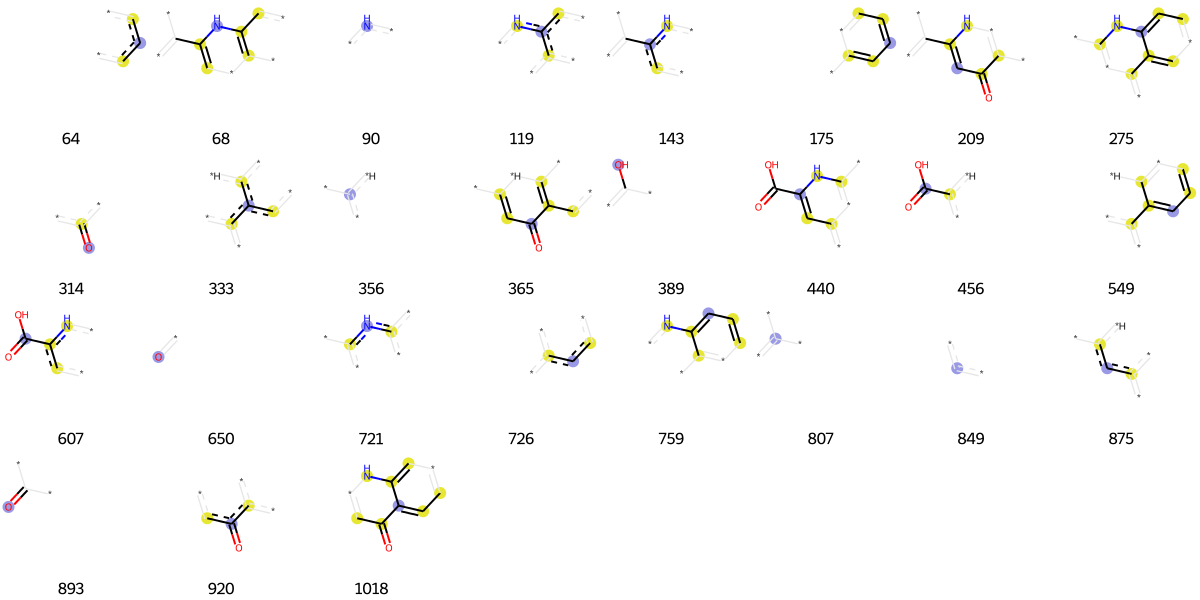

In [1275]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [1276]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[33,
 36,
 43,
 90,
 121,
 135,
 136,
 138,
 142,
 146,
 222,
 273,
 275,
 279,
 305,
 314,
 327,
 338,
 344,
 352,
 356,
 366,
 378,
 392,
 407,
 409,
 456,
 464,
 511,
 561,
 579,
 625,
 650,
 659,
 707,
 713,
 726,
 738,
 772,
 842,
 849,
 873,
 892,
 896,
 898,
 904,
 926,
 935,
 940,
 948]

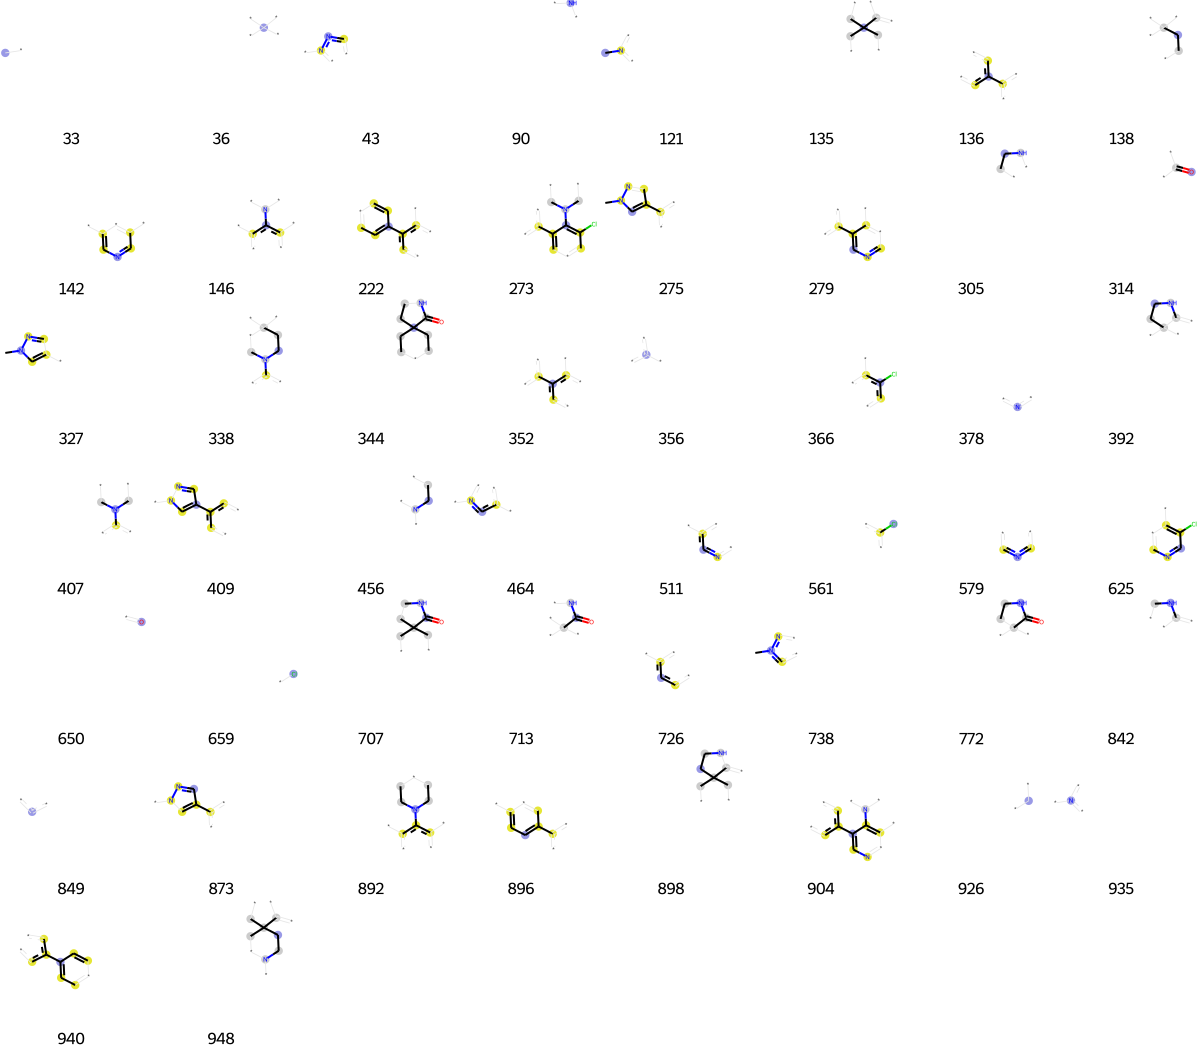

In [1277]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [1278]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 33,
 64,
 73,
 74,
 80,
 90,
 100,
 123,
 136,
 140,
 175,
 186,
 214,
 222,
 283,
 293,
 294,
 310,
 336,
 352,
 356,
 378,
 389,
 412,
 414,
 507,
 540,
 561,
 585,
 591,
 614,
 619,
 650,
 667,
 726,
 730,
 749,
 752,
 794,
 807,
 820,
 837,
 841,
 849,
 873,
 881,
 887,
 893,
 896,
 922,
 926,
 929,
 981,
 984]

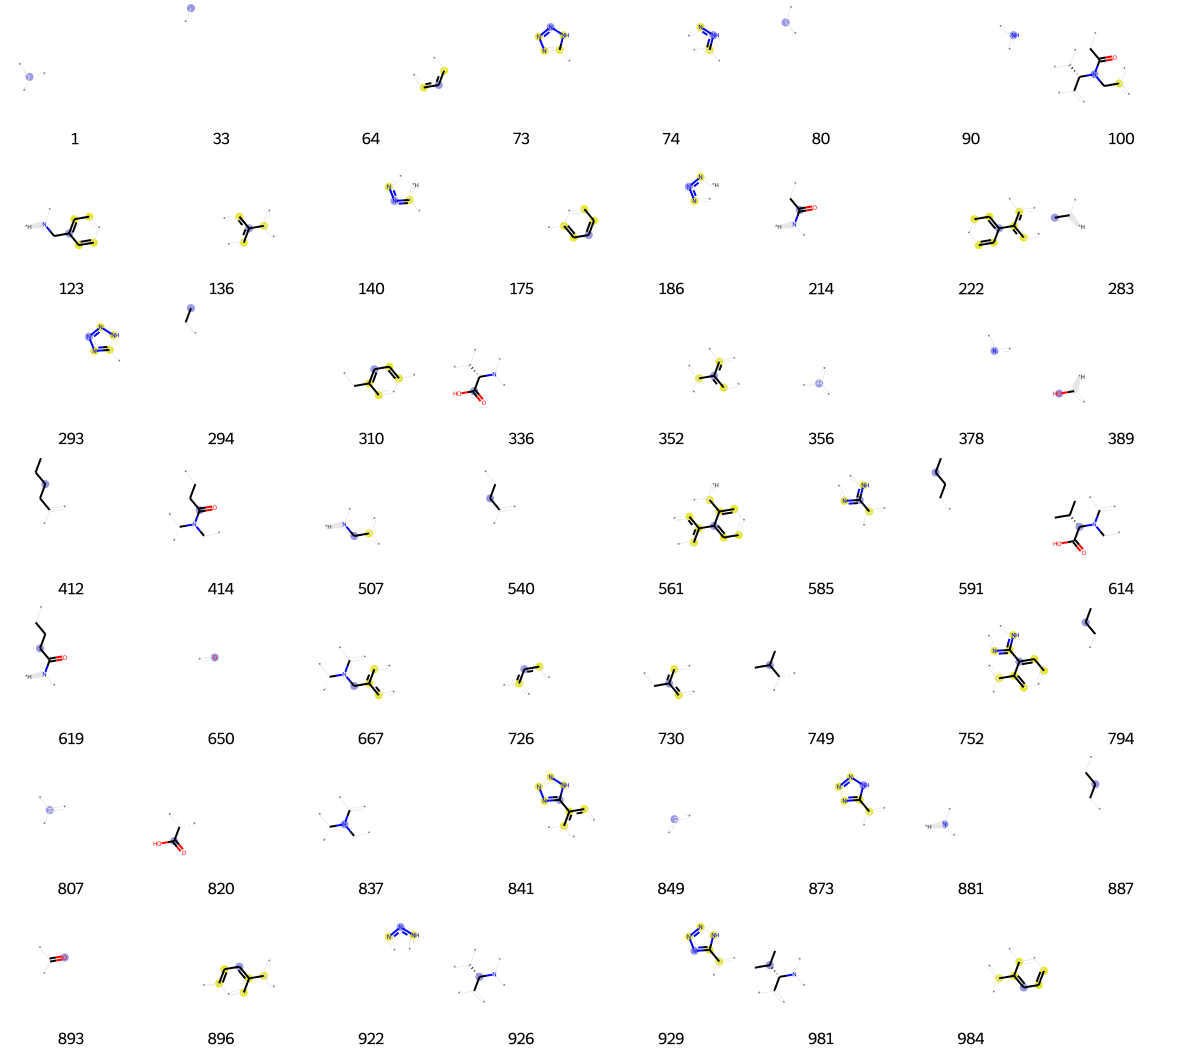

In [1279]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [1280]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[33,
 36,
 45,
 64,
 80,
 90,
 119,
 121,
 139,
 175,
 218,
 221,
 261,
 314,
 328,
 333,
 352,
 356,
 431,
 439,
 452,
 464,
 479,
 546,
 549,
 570,
 633,
 650,
 652,
 662,
 693,
 726,
 759,
 806,
 834,
 838,
 849,
 852,
 855,
 881,
 887,
 913,
 927,
 935,
 946,
 955,
 1008]

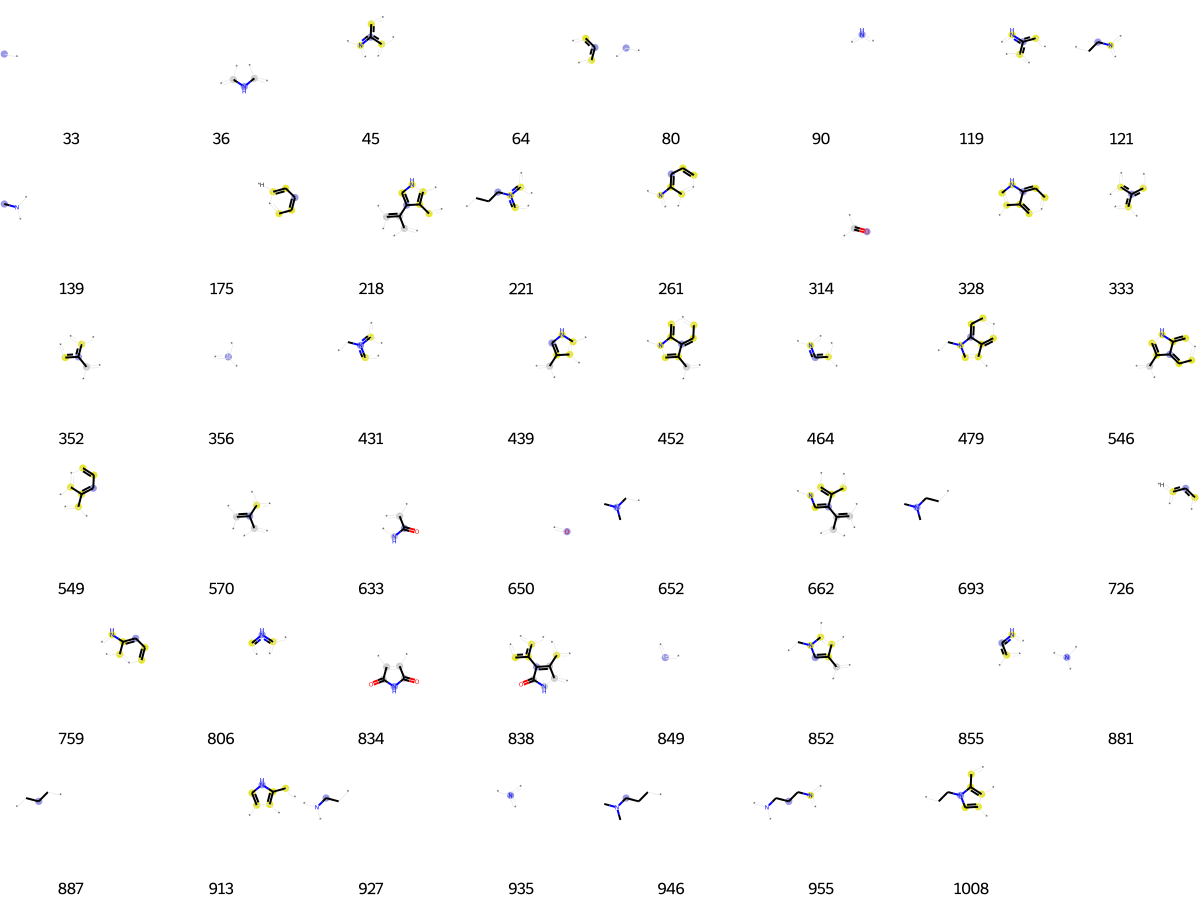

In [1281]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [1282]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[24,
 29,
 64,
 77,
 80,
 94,
 97,
 114,
 129,
 134,
 140,
 146,
 175,
 231,
 255,
 271,
 301,
 318,
 335,
 340,
 356,
 378,
 389,
 407,
 429,
 456,
 458,
 573,
 634,
 639,
 647,
 672,
 726,
 797,
 802,
 809,
 849,
 854,
 904,
 926,
 935,
 945,
 976,
 982,
 992,
 1019]

In [1283]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[23,
 24,
 33,
 136,
 141,
 171,
 202,
 248,
 252,
 265,
 290,
 304,
 354,
 356,
 361,
 378,
 463,
 518,
 536,
 553,
 561,
 578,
 583,
 605,
 607,
 609,
 650,
 656,
 659,
 698,
 715,
 716,
 717,
 723,
 748,
 753,
 807,
 816,
 831,
 838,
 839,
 849,
 875,
 886,
 903,
 939,
 951,
 964,
 1011,
 1020]

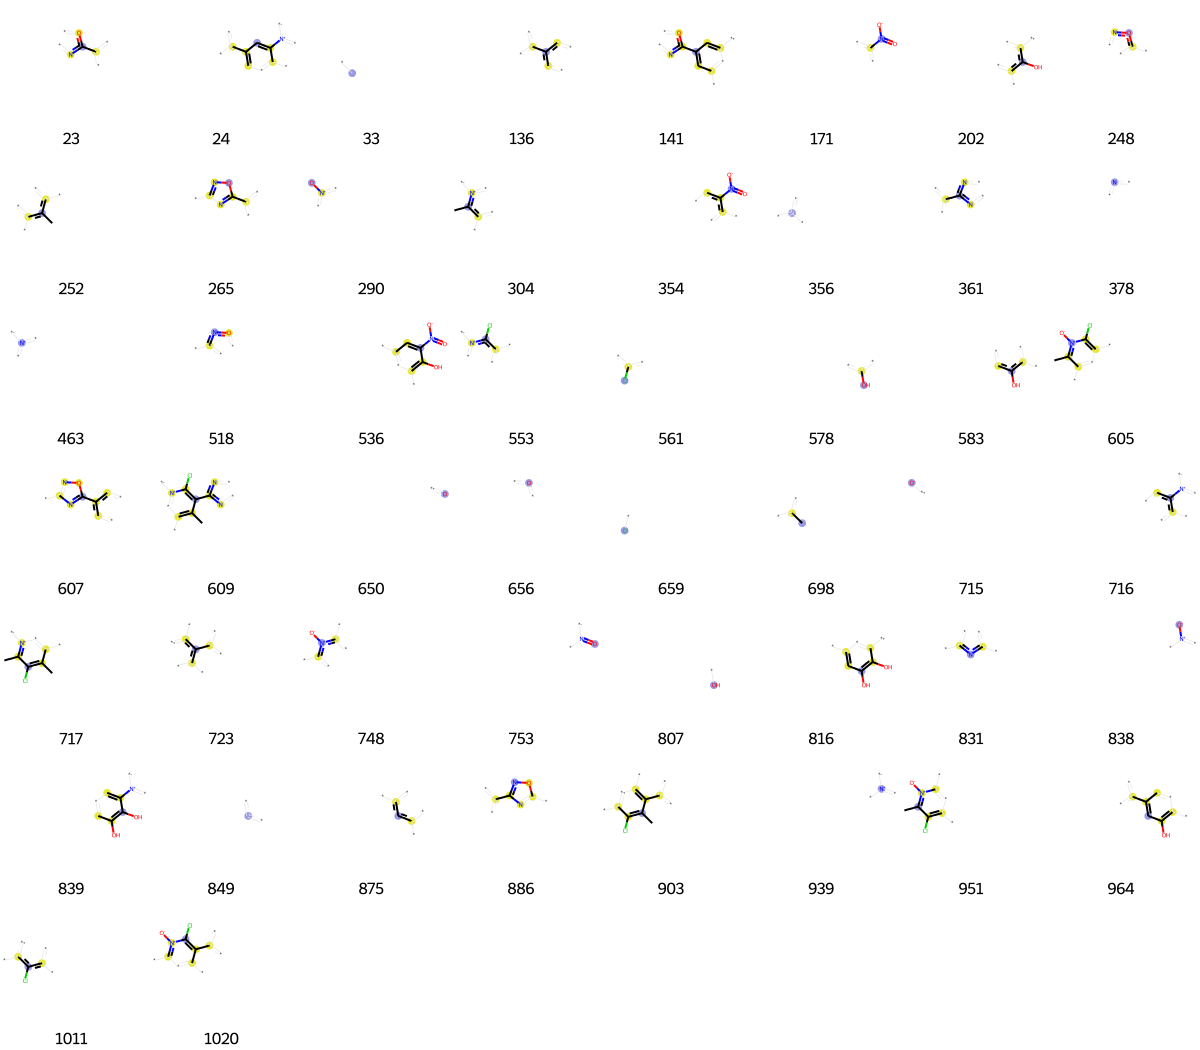

In [1284]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [1285]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[15, 63, 64, 203, 356, 701, 725, 726, 831, 849, 960]

In [1286]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[50,
 129,
 147,
 173,
 250,
 279,
 319,
 350,
 356,
 366,
 433,
 452,
 548,
 561,
 583,
 650,
 659,
 715,
 726,
 833,
 849,
 875,
 910]

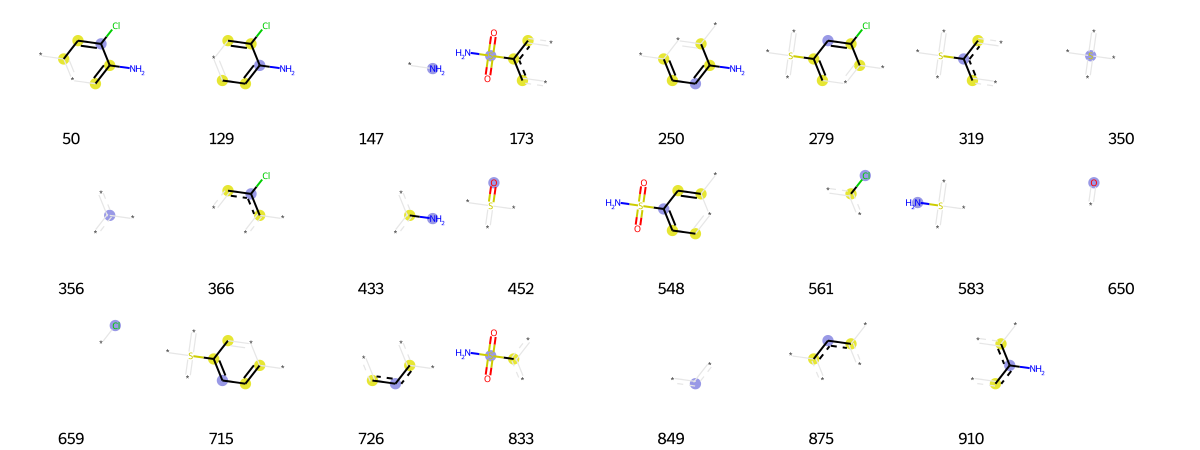

In [1287]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [1288]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[14,
 33,
 64,
 65,
 76,
 84,
 121,
 128,
 175,
 192,
 200,
 207,
 212,
 233,
 249,
 301,
 335,
 342,
 356,
 366,
 378,
 391,
 407,
 411,
 428,
 440,
 449,
 456,
 458,
 486,
 491,
 496,
 511,
 512,
 544,
 555,
 558,
 561,
 601,
 650,
 659,
 672,
 687,
 695,
 708,
 712,
 721,
 726,
 756,
 801,
 830,
 831,
 832,
 841,
 847,
 849,
 875,
 881,
 886,
 926,
 935,
 946,
 1002,
 1019]

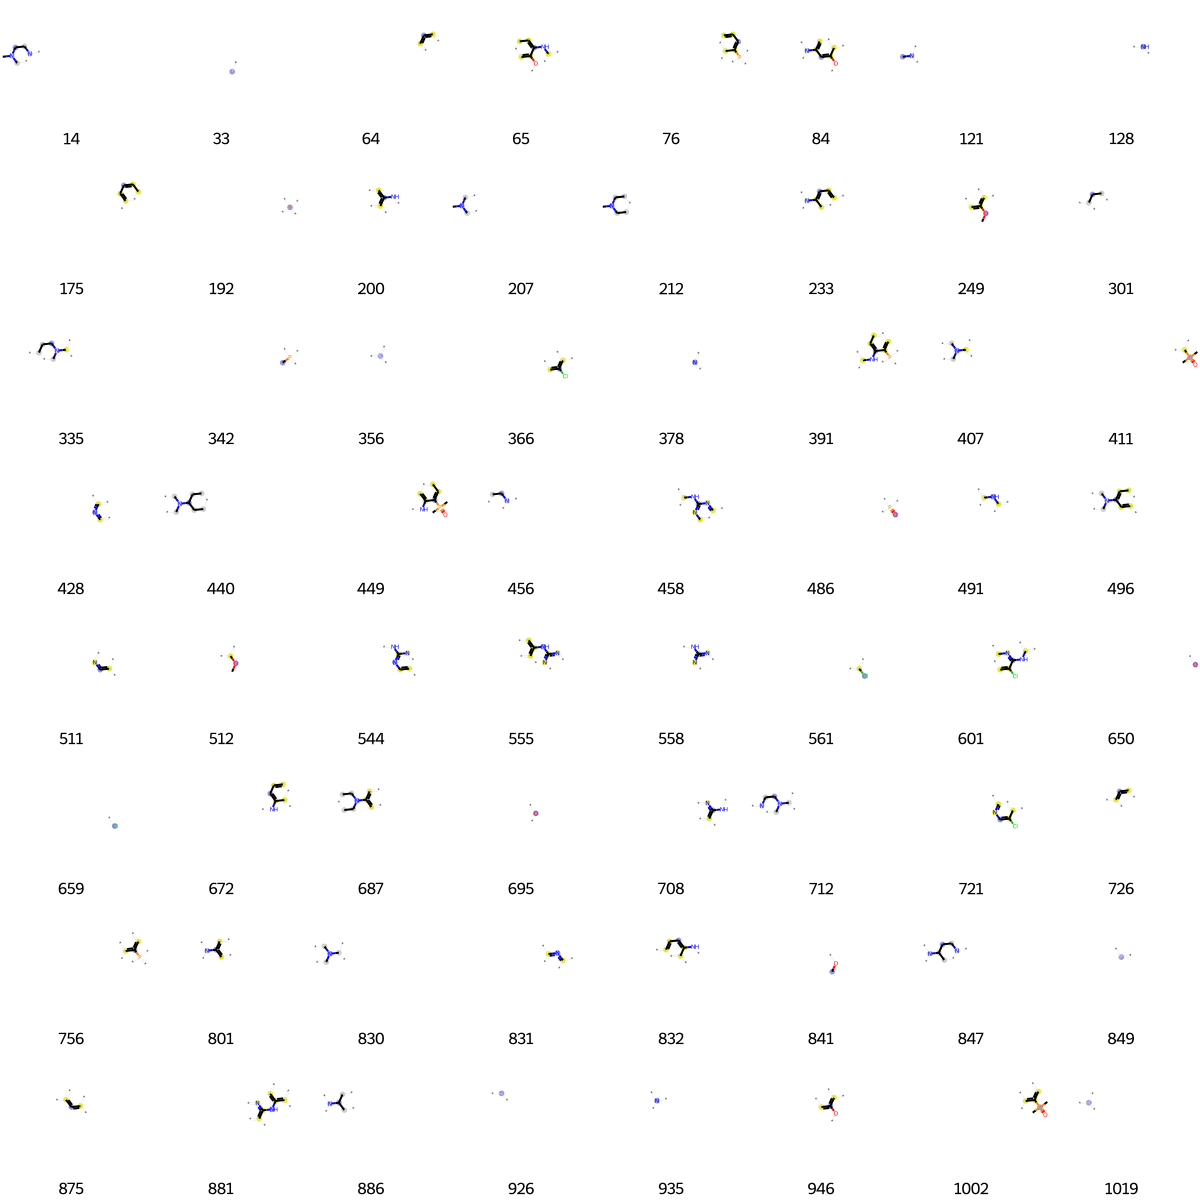

In [1289]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [1290]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[36,
 73,
 138,
 147,
 151,
 184,
 301,
 335,
 350,
 389,
 407,
 559,
 622,
 650,
 671,
 678,
 807,
 860,
 875,
 893,
 926,
 944,
 1009,
 1019]

In [1291]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[4,
 14,
 33,
 59,
 66,
 80,
 114,
 202,
 204,
 219,
 315,
 356,
 358,
 369,
 391,
 392,
 419,
 456,
 540,
 578,
 650,
 730,
 744,
 753,
 760,
 807,
 849,
 875,
 893,
 926,
 935,
 985,
 996,
 1009]

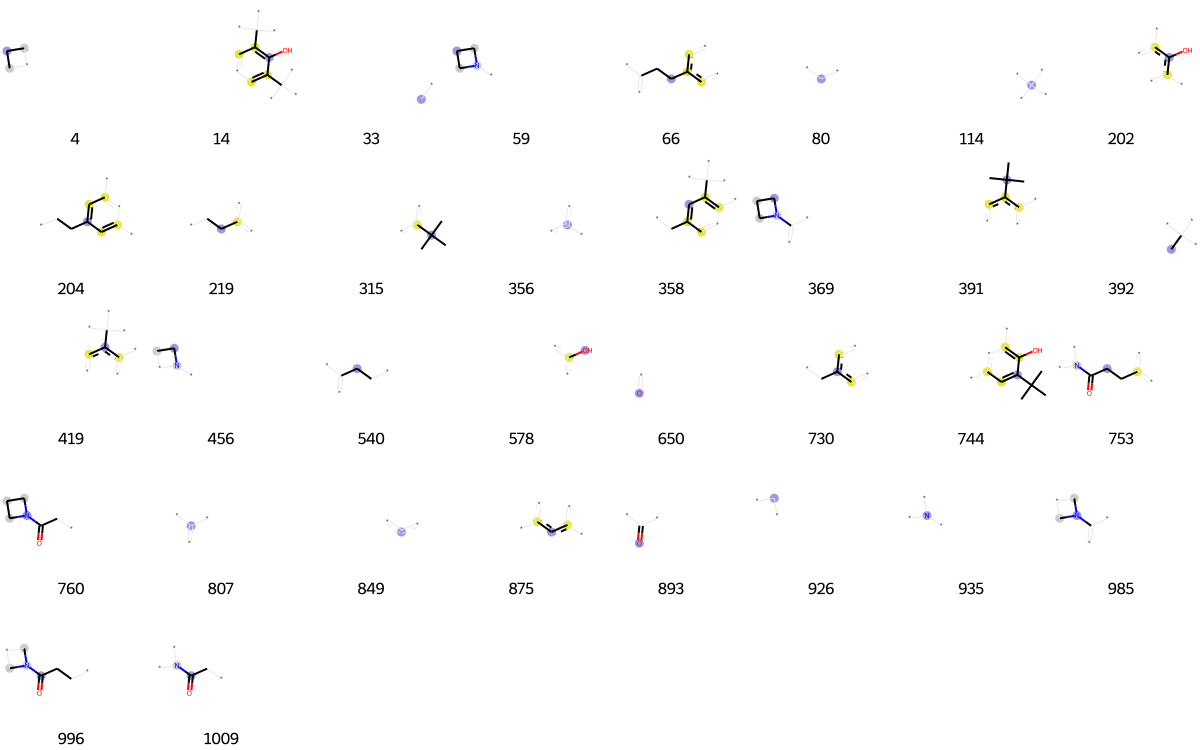

In [1292]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [1293]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[2,
 4,
 42,
 45,
 64,
 90,
 119,
 162,
 175,
 212,
 244,
 261,
 301,
 310,
 314,
 346,
 355,
 356,
 419,
 455,
 456,
 469,
 478,
 480,
 556,
 563,
 650,
 652,
 675,
 701,
 714,
 721,
 725,
 726,
 758,
 759,
 793,
 807,
 847,
 849,
 875,
 884,
 886,
 893,
 926,
 935,
 942,
 961,
 985,
 987,
 1019,
 1022]

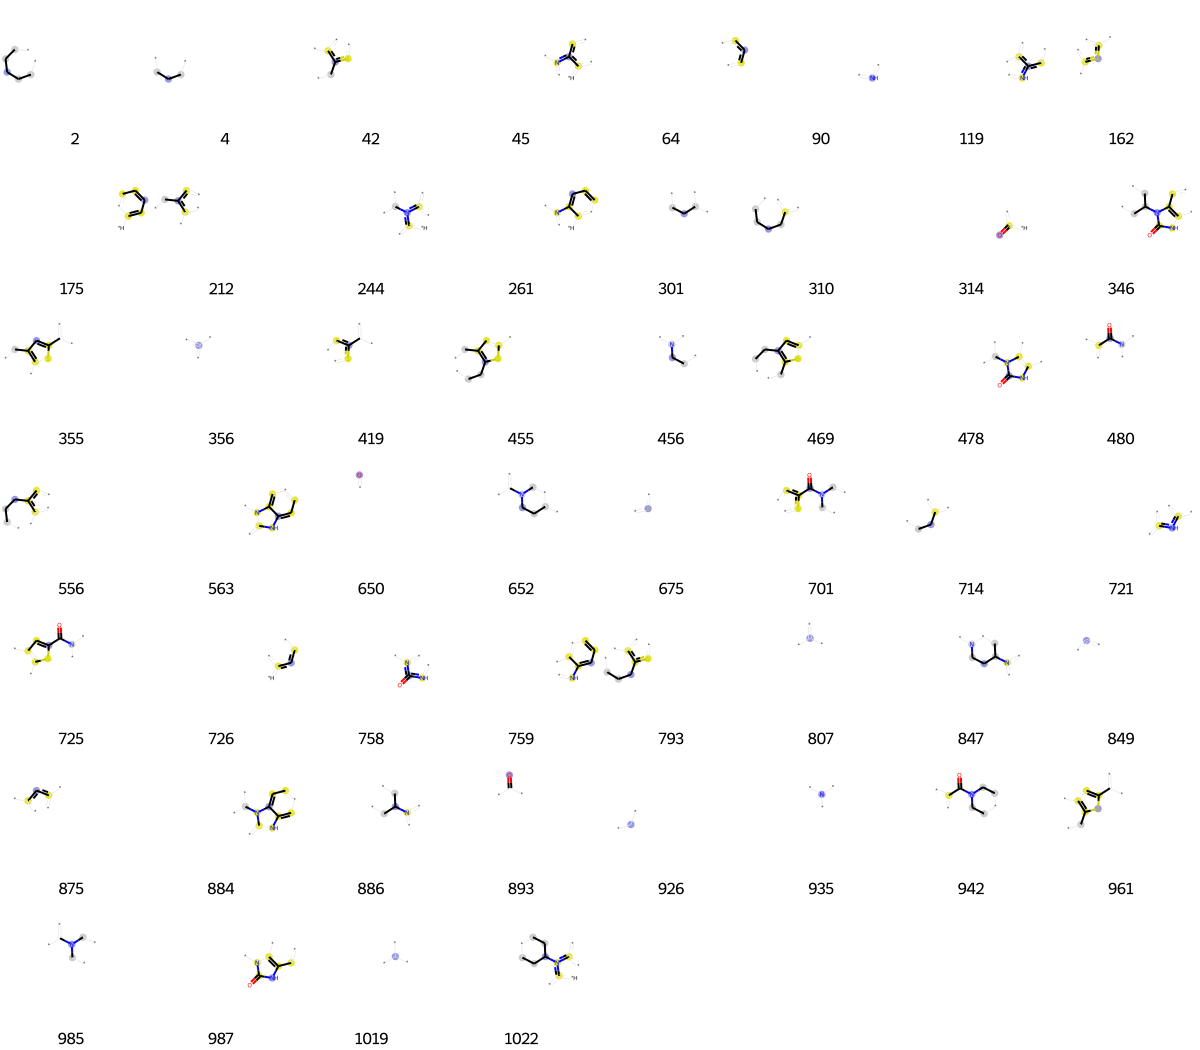

In [1294]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [1295]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[0,
 9,
 41,
 64,
 74,
 80,
 90,
 114,
 128,
 175,
 184,
 191,
 262,
 314,
 325,
 333,
 347,
 356,
 366,
 378,
 384,
 419,
 426,
 429,
 537,
 549,
 561,
 645,
 650,
 659,
 666,
 726,
 732,
 750,
 754,
 792,
 807,
 809,
 843,
 849,
 873,
 875,
 893,
 901,
 904,
 906,
 980,
 1019]

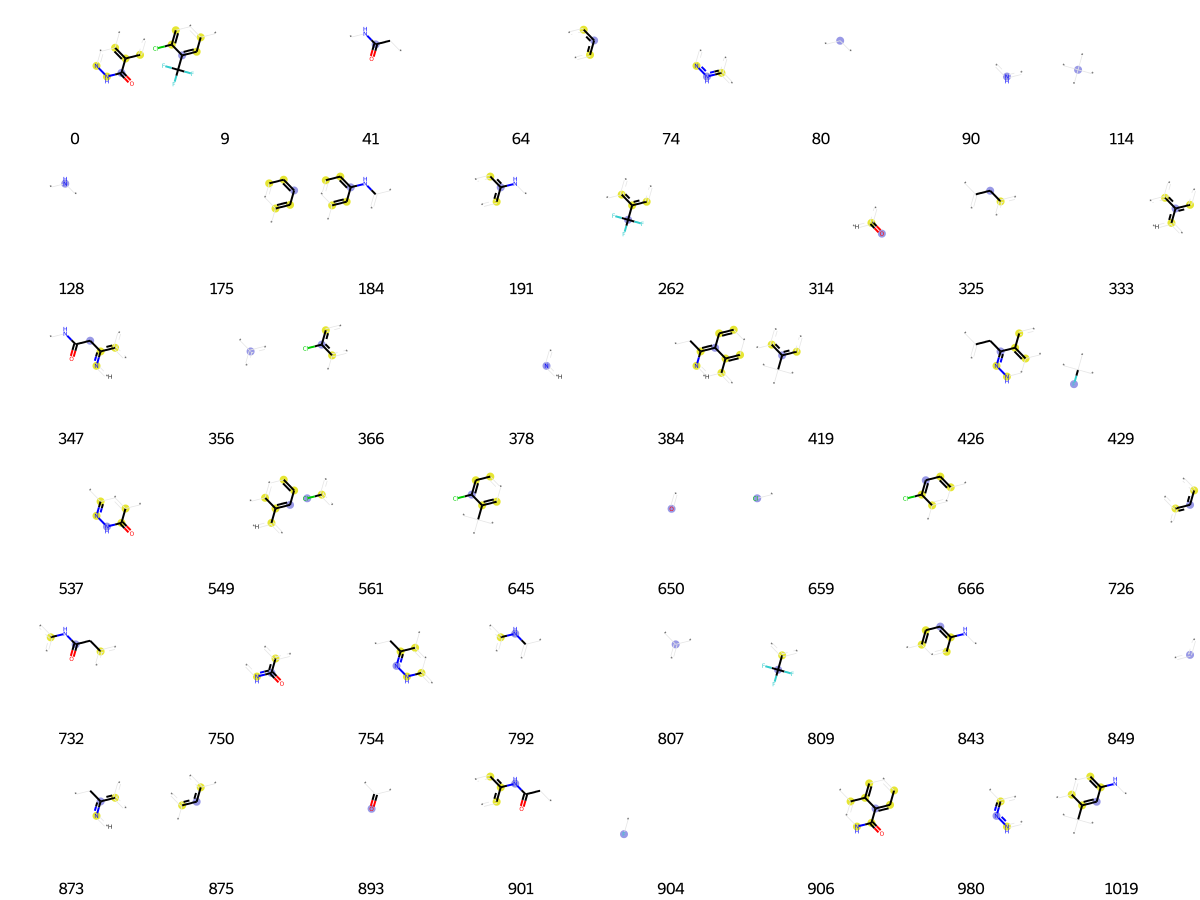

In [1296]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [1297]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[14,
 64,
 73,
 79,
 90,
 99,
 119,
 128,
 165,
 175,
 200,
 216,
 241,
 254,
 274,
 289,
 314,
 323,
 328,
 343,
 352,
 356,
 378,
 383,
 419,
 486,
 535,
 543,
 561,
 628,
 650,
 659,
 661,
 675,
 680,
 706,
 721,
 722,
 726,
 750,
 759,
 792,
 807,
 816,
 830,
 831,
 849,
 875,
 893,
 915,
 947]

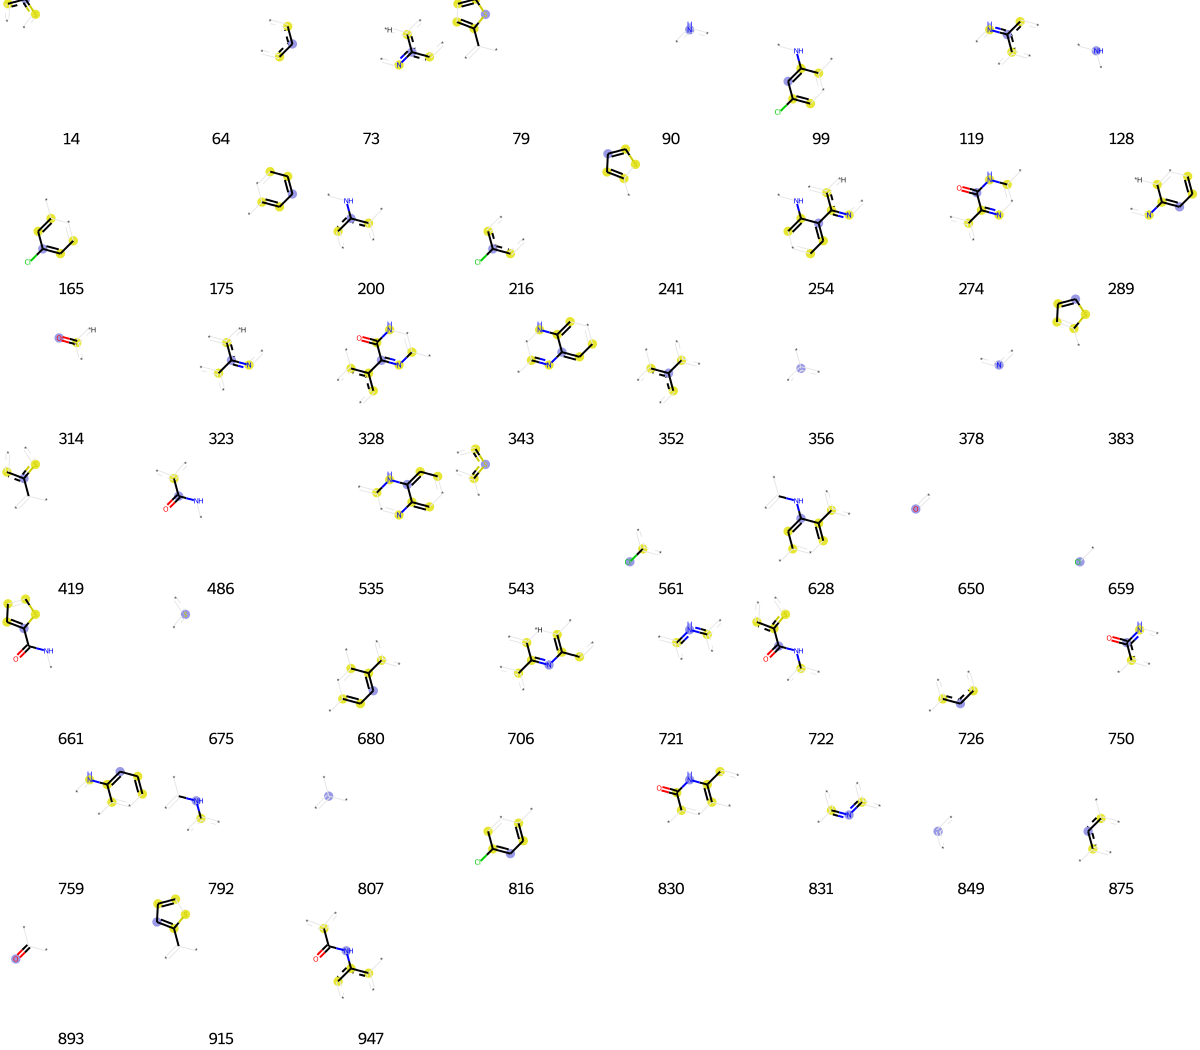

In [1298]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [1299]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 11,
 33,
 60,
 64,
 69,
 73,
 80,
 90,
 106,
 116,
 117,
 119,
 128,
 154,
 158,
 175,
 214,
 224,
 237,
 252,
 289,
 291,
 294,
 322,
 333,
 343,
 356,
 368,
 378,
 394,
 403,
 428,
 477,
 486,
 534,
 535,
 570,
 575,
 580,
 632,
 650,
 656,
 695,
 698,
 718,
 721,
 722,
 726,
 739,
 759,
 767,
 784,
 786,
 807,
 831,
 849,
 853,
 875,
 893,
 895,
 918,
 963,
 982]

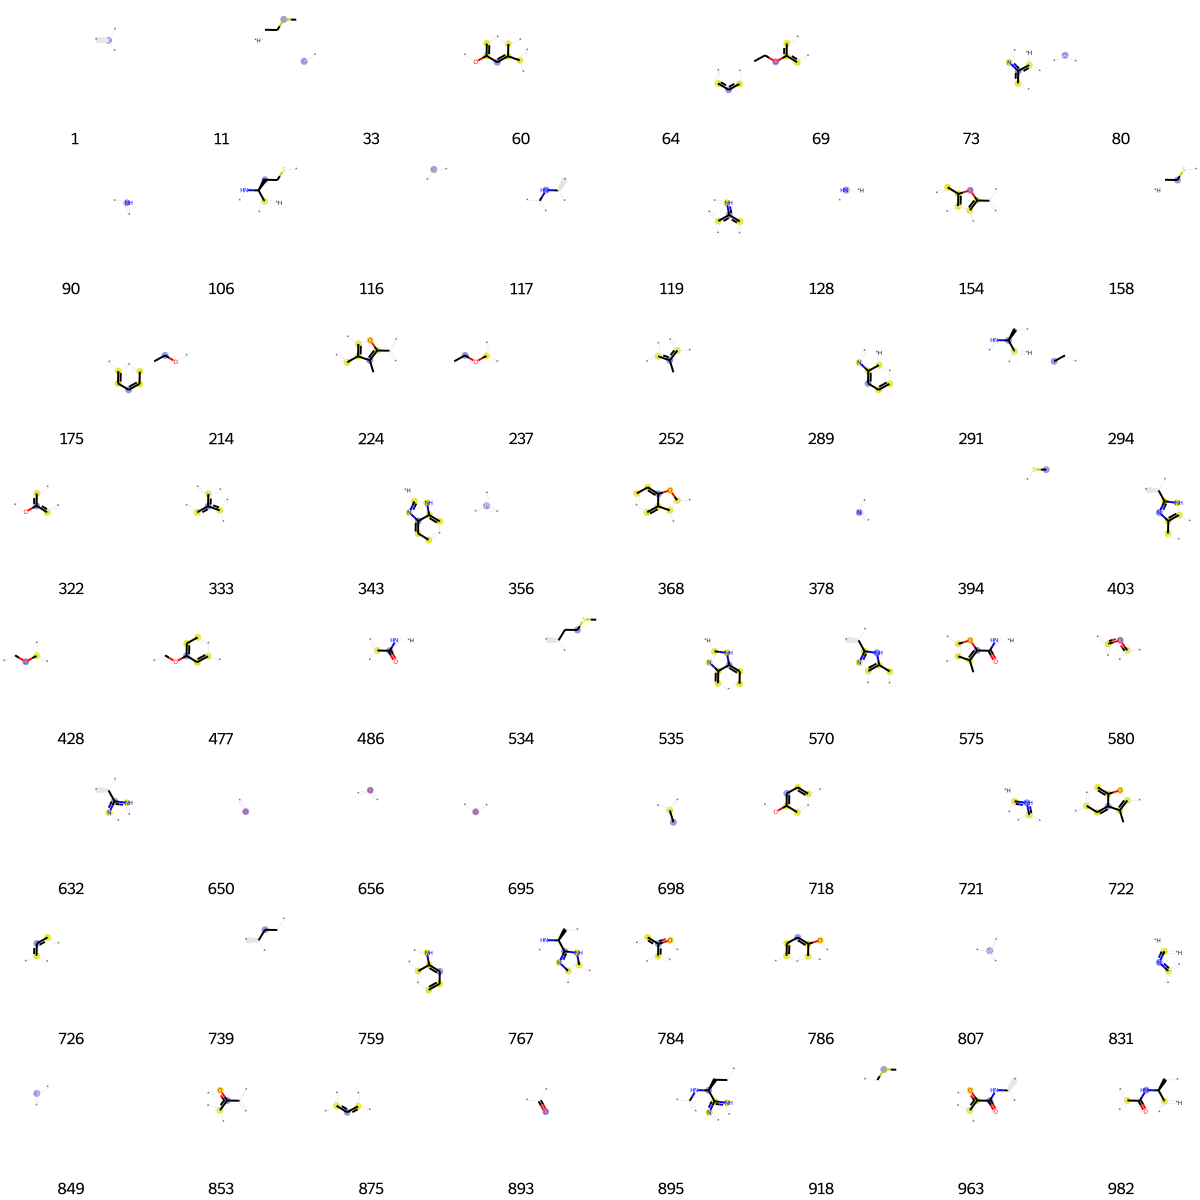

In [1300]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [1301]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[15,
 33,
 63,
 64,
 65,
 71,
 80,
 139,
 157,
 175,
 212,
 260,
 305,
 325,
 329,
 332,
 333,
 356,
 389,
 507,
 540,
 549,
 573,
 649,
 694,
 726,
 831,
 835,
 849,
 866,
 878,
 881,
 1009]

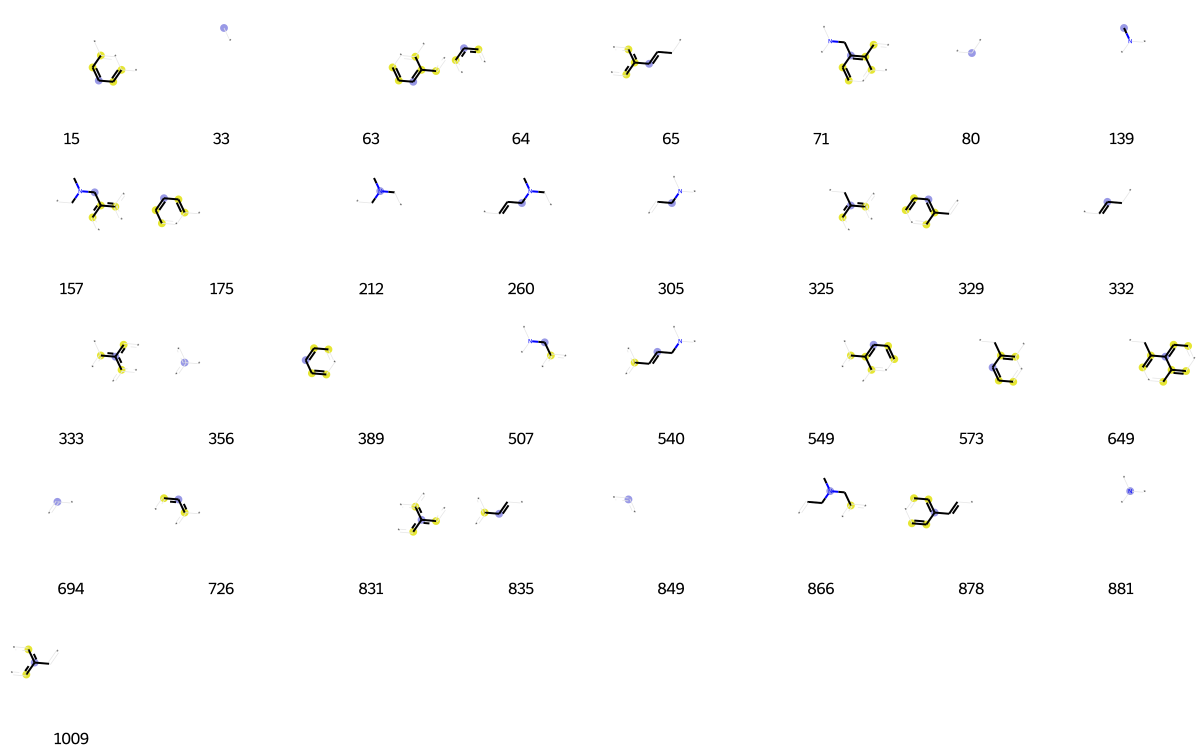

In [1302]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [1303]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[8,
 9,
 41,
 64,
 80,
 114,
 128,
 175,
 184,
 191,
 197,
 262,
 293,
 356,
 358,
 363,
 366,
 419,
 423,
 425,
 429,
 486,
 540,
 561,
 645,
 650,
 659,
 666,
 667,
 726,
 792,
 804,
 807,
 809,
 843,
 849,
 875,
 893,
 901,
 904,
 967,
 974,
 1019]

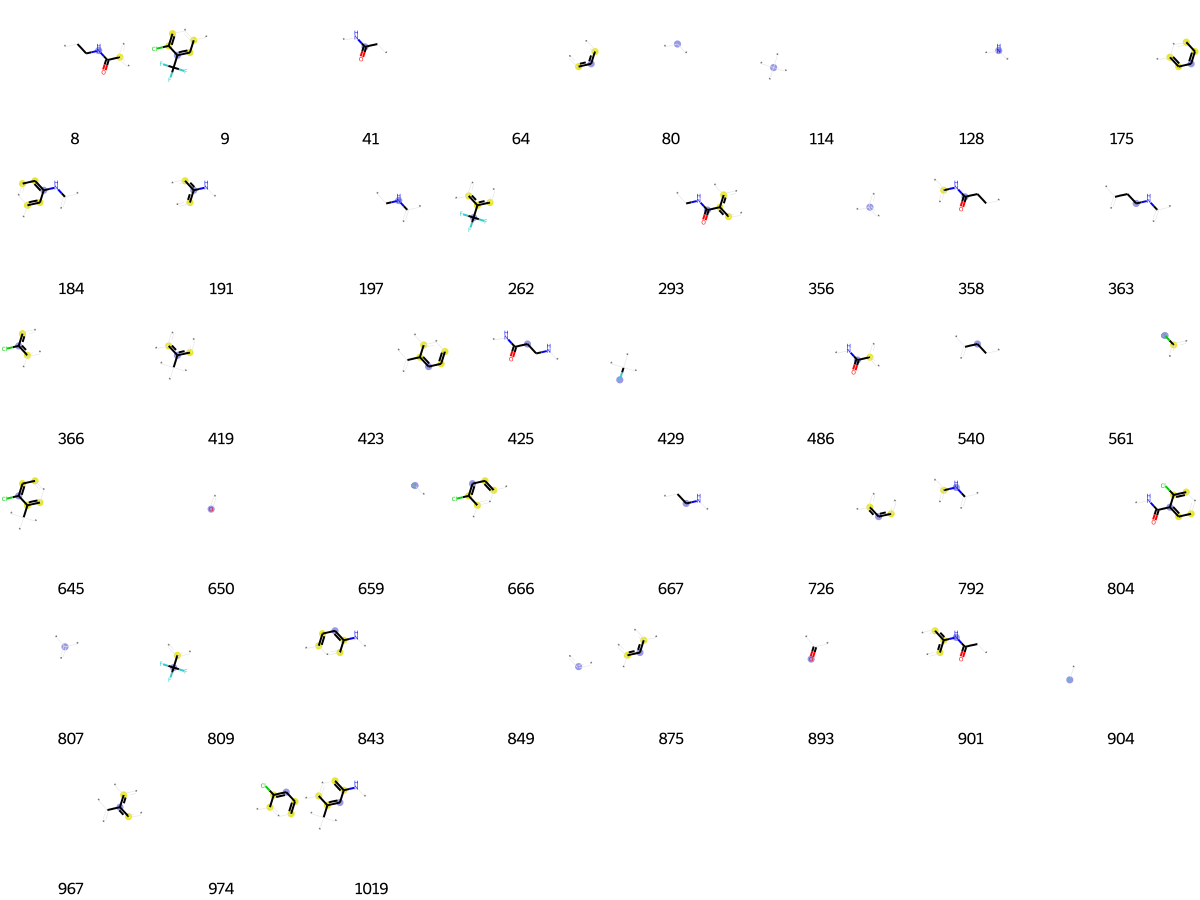

In [1304]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [1305]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[15,
 42,
 64,
 73,
 80,
 86,
 94,
 107,
 113,
 128,
 133,
 157,
 161,
 184,
 191,
 202,
 230,
 329,
 333,
 342,
 343,
 356,
 366,
 378,
 420,
 428,
 463,
 489,
 491,
 557,
 561,
 579,
 621,
 629,
 646,
 650,
 659,
 694,
 695,
 699,
 708,
 720,
 726,
 730,
 745,
 786,
 792,
 794,
 807,
 843,
 849,
 875,
 888,
 893,
 904,
 922,
 946,
 959,
 961,
 991]

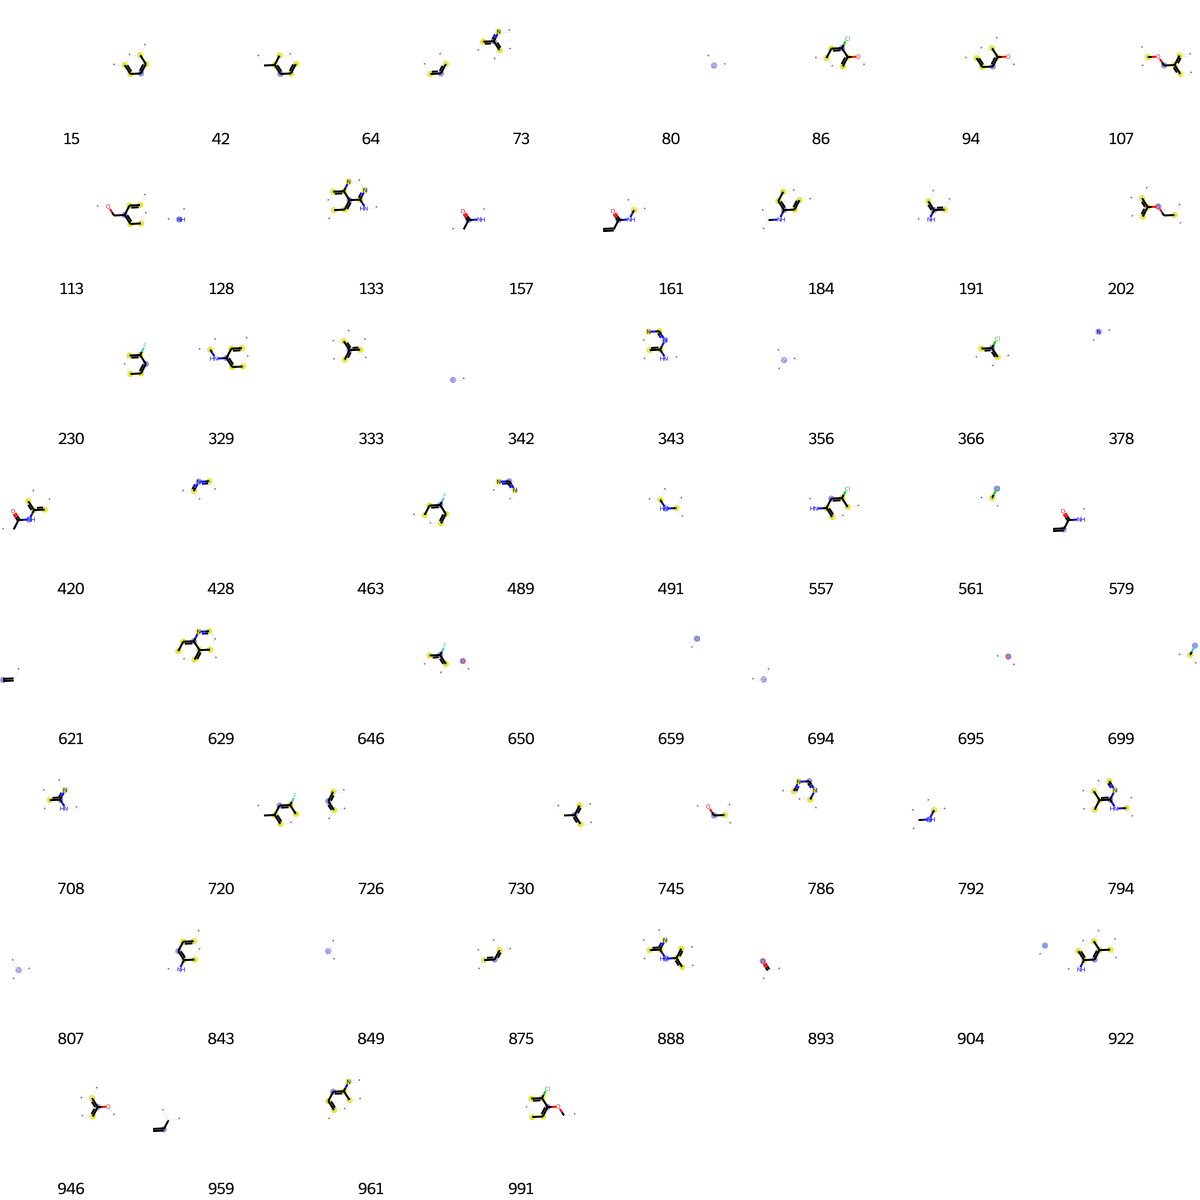

In [1306]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [1307]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[33,
 64,
 77,
 80,
 121,
 139,
 175,
 177,
 187,
 212,
 271,
 356,
 446,
 588,
 623,
 641,
 652,
 684,
 693,
 714,
 726,
 849,
 881,
 887,
 926,
 927,
 935,
 946,
 955]

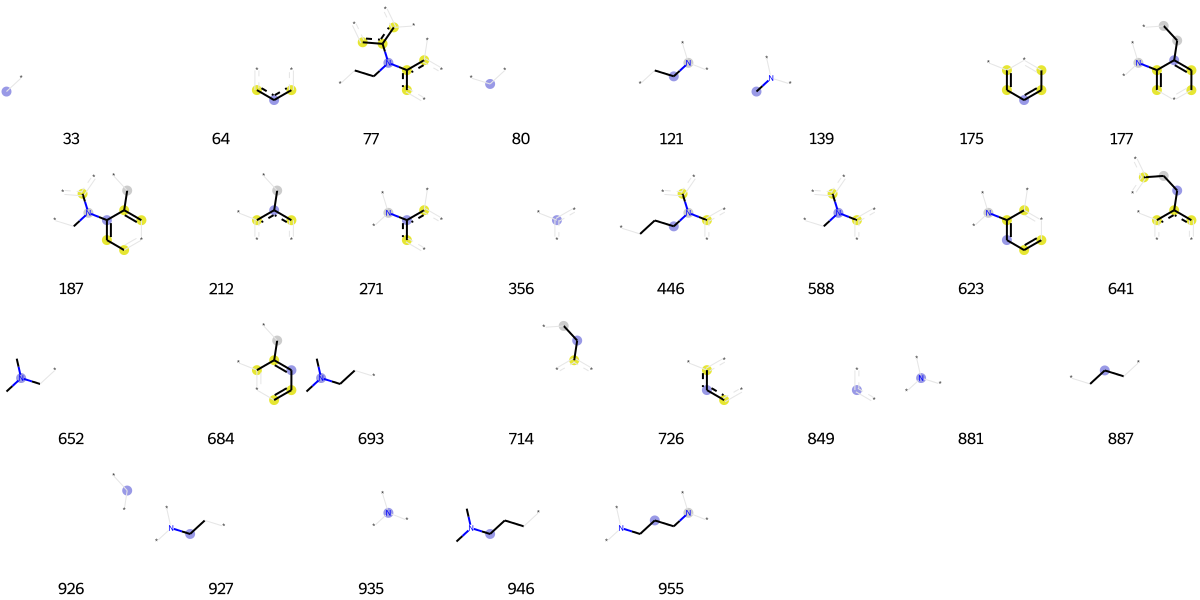

In [1308]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [1309]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[1,
 9,
 33,
 71,
 75,
 80,
 147,
 152,
 194,
 209,
 229,
 233,
 348,
 356,
 357,
 362,
 378,
 389,
 403,
 428,
 433,
 435,
 454,
 463,
 489,
 519,
 548,
 558,
 577,
 610,
 620,
 640,
 650,
 656,
 672,
 691,
 700,
 739,
 764,
 766,
 767,
 786,
 807,
 820,
 825,
 849,
 893,
 897,
 932,
 933,
 935,
 962,
 1019]

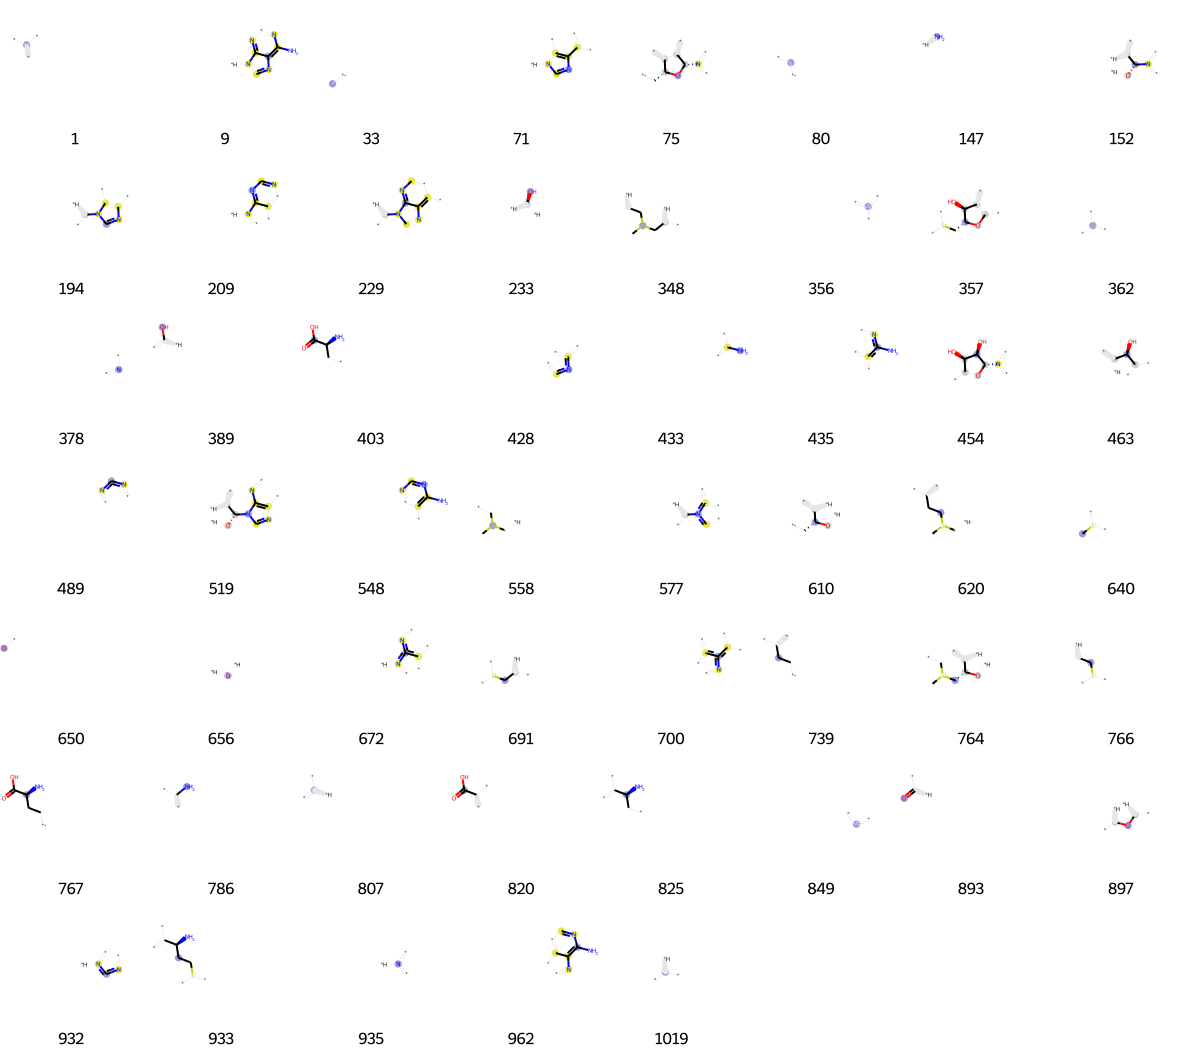

In [1310]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [1311]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[21,
 71,
 75,
 80,
 128,
 144,
 147,
 152,
 194,
 209,
 210,
 219,
 222,
 229,
 233,
 282,
 310,
 343,
 356,
 378,
 392,
 415,
 428,
 433,
 454,
 463,
 483,
 489,
 492,
 519,
 577,
 610,
 614,
 637,
 656,
 667,
 672,
 700,
 708,
 726,
 730,
 740,
 780,
 786,
 807,
 820,
 849,
 888,
 897,
 932,
 935,
 1019]

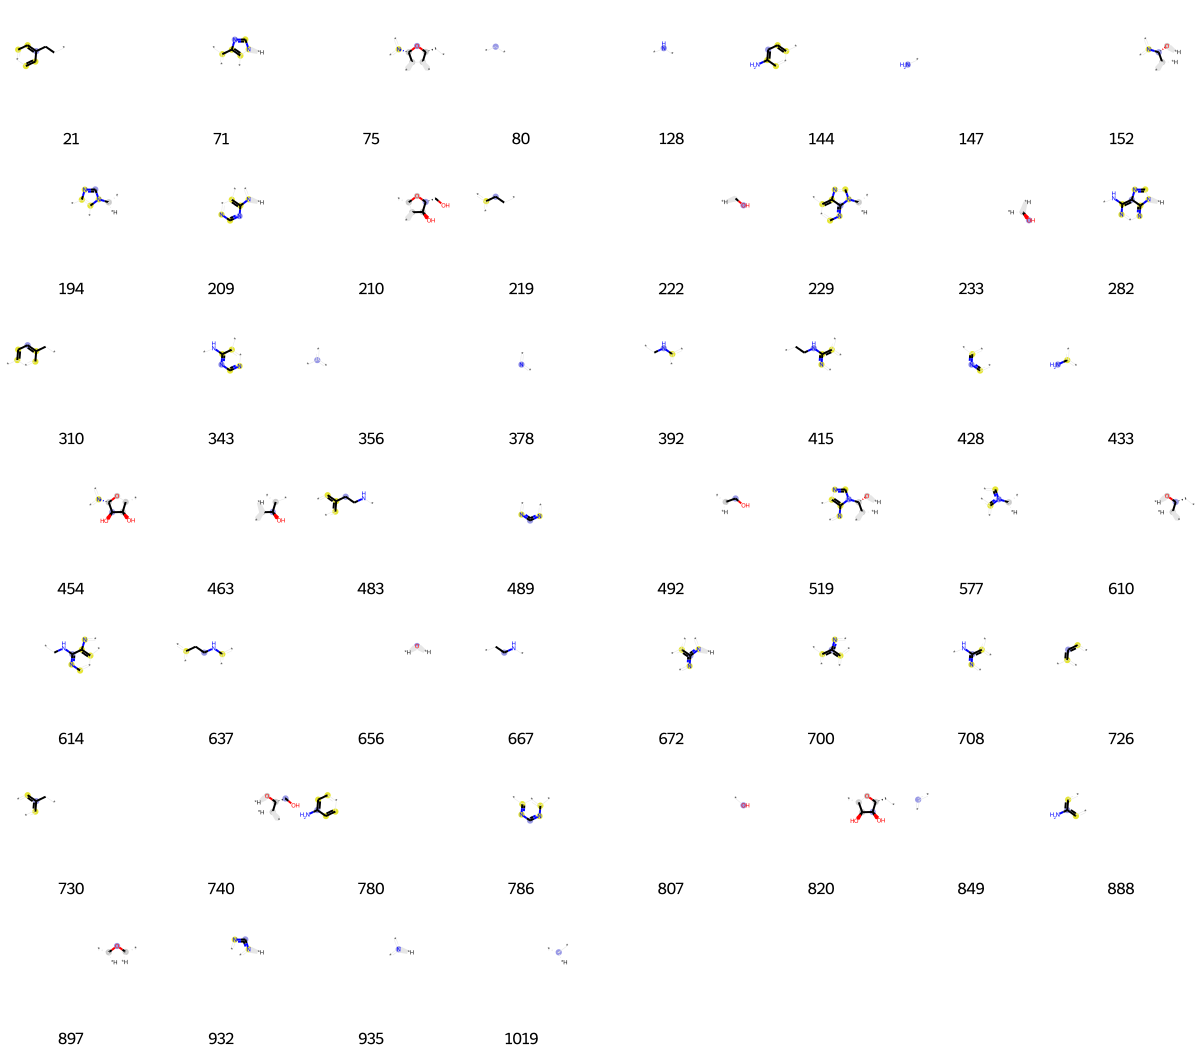

In [1312]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [1313]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[8,
 46,
 80,
 121,
 128,
 197,
 216,
 265,
 356,
 361,
 381,
 417,
 456,
 458,
 486,
 523,
 561,
 586,
 641,
 650,
 656,
 659,
 667,
 673,
 714,
 726,
 767,
 807,
 816,
 825,
 849,
 893,
 926,
 935,
 950]

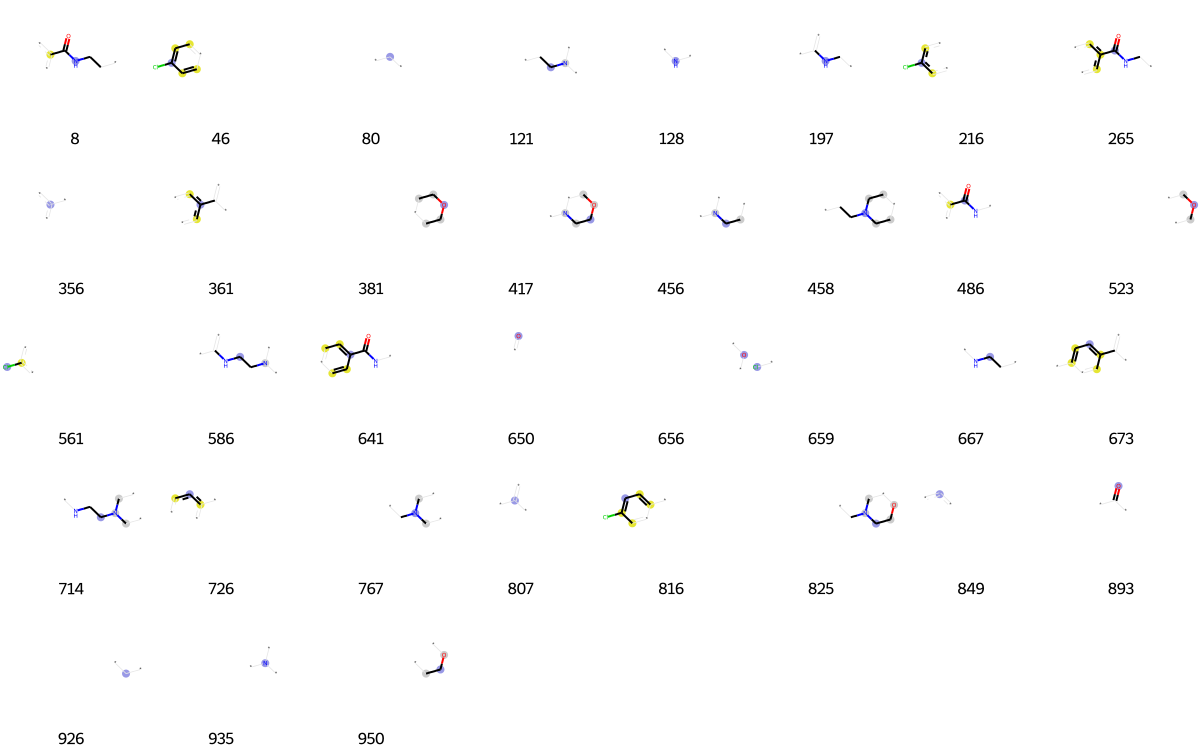

In [1314]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [1315]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[0,
 1,
 33,
 47,
 57,
 59,
 80,
 87,
 102,
 147,
 207,
 231,
 233,
 268,
 277,
 283,
 285,
 288,
 294,
 300,
 314,
 356,
 359,
 367,
 433,
 520,
 547,
 551,
 590,
 591,
 597,
 610,
 643,
 650,
 653,
 656,
 680,
 695,
 697,
 722,
 736,
 750,
 798,
 807,
 832,
 849,
 882,
 892,
 893,
 918,
 924,
 926,
 970,
 975,
 987,
 1004,
 1015,
 1019]

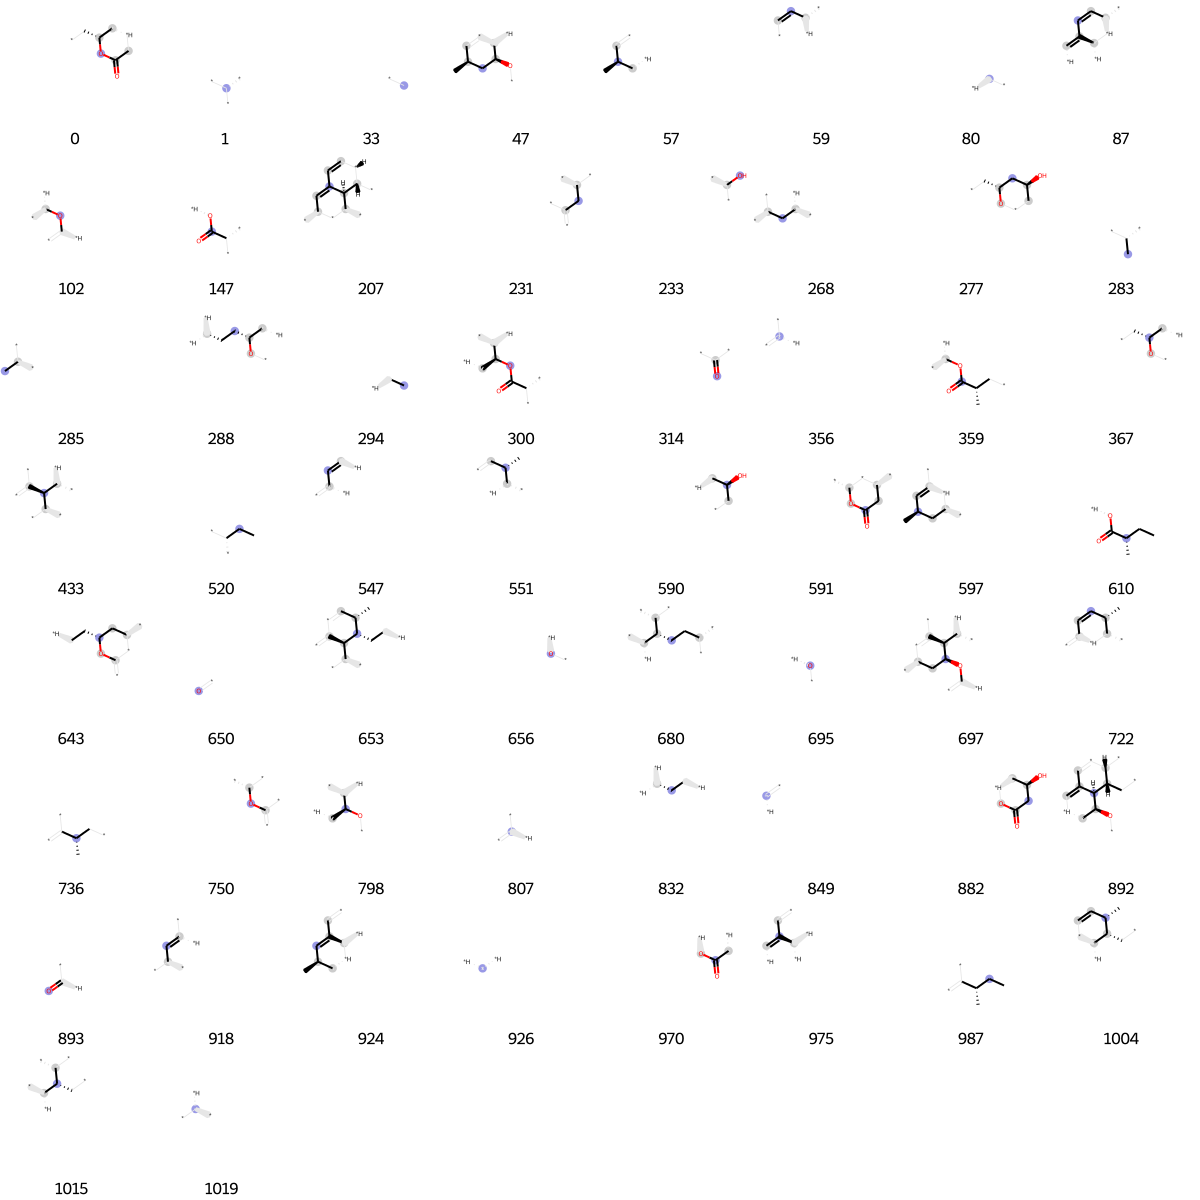

In [1316]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [1317]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[33,
 36,
 126,
 207,
 211,
 231,
 250,
 314,
 356,
 389,
 407,
 469,
 553,
 650,
 664,
 673,
 697,
 734,
 753,
 767,
 772,
 798,
 807,
 809,
 893,
 926,
 935,
 970,
 1019]

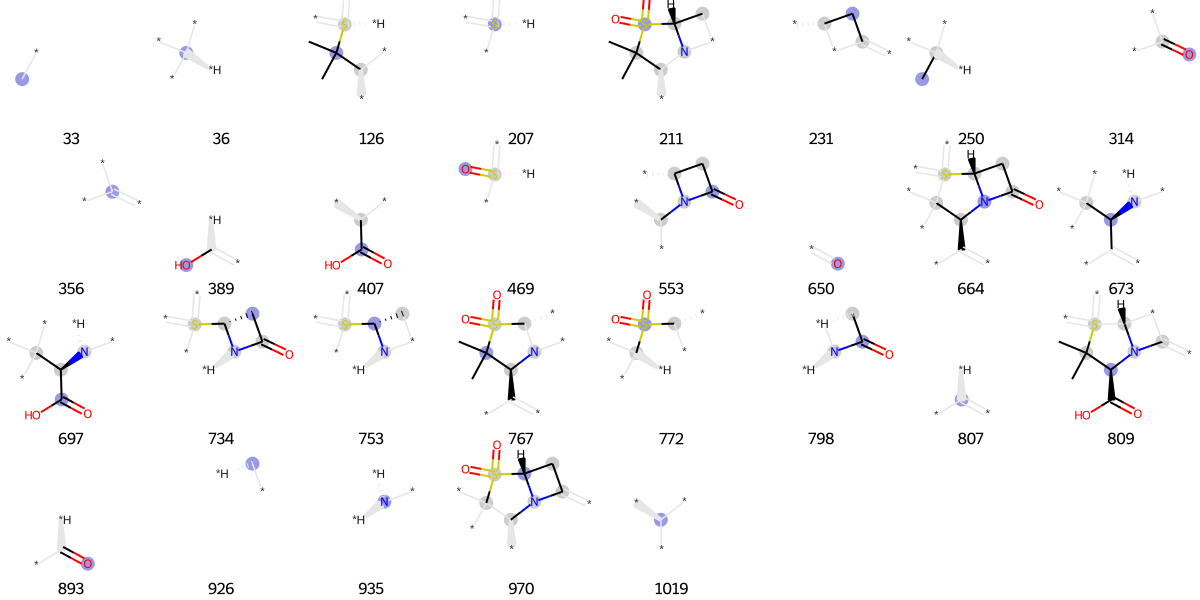

In [1318]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [1319]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[23,
 25,
 31,
 33,
 64,
 94,
 128,
 140,
 157,
 175,
 200,
 221,
 249,
 284,
 327,
 356,
 389,
 419,
 423,
 456,
 512,
 650,
 672,
 694,
 695,
 726,
 745,
 792,
 804,
 807,
 835,
 841,
 849,
 875,
 882,
 893,
 946,
 967,
 1009,
 1015,
 1017]

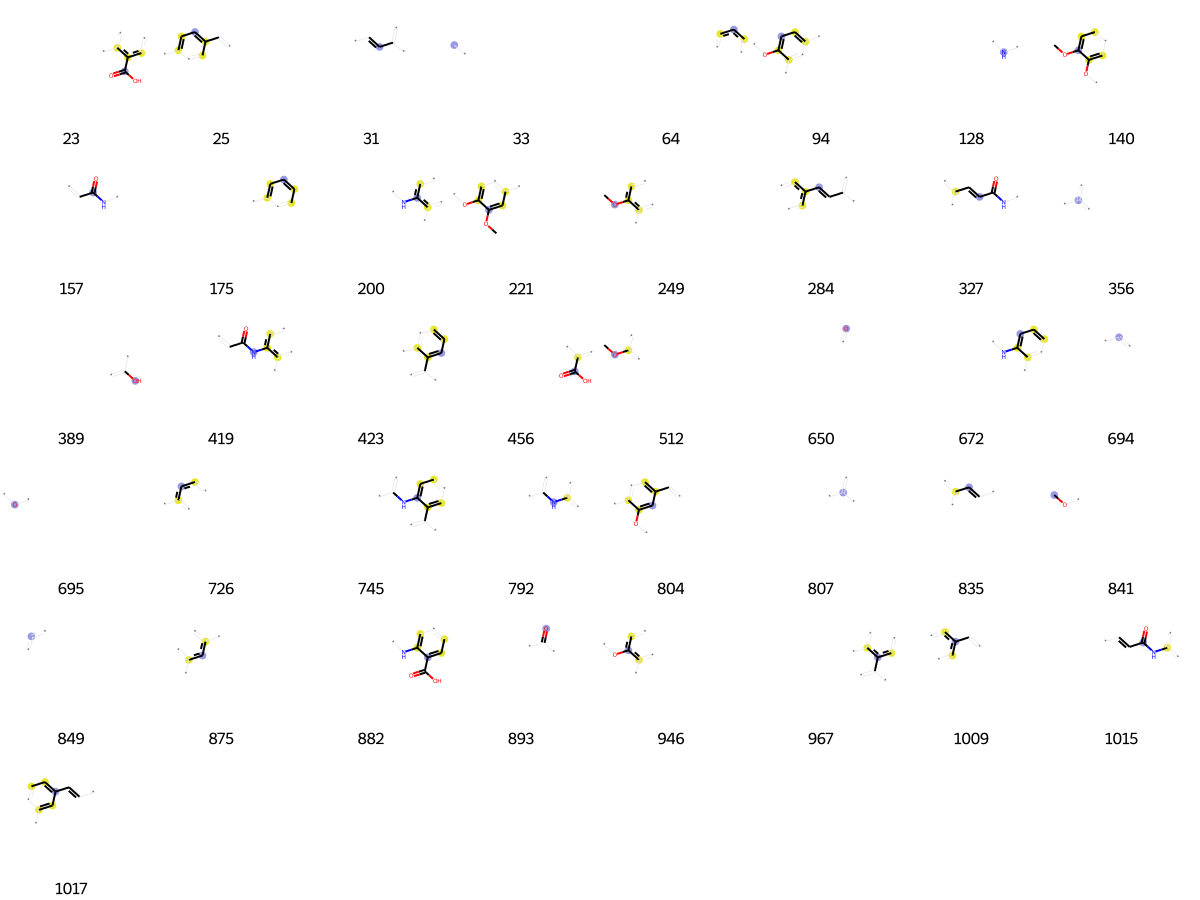

In [1320]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [1321]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[65,
 80,
 81,
 140,
 147,
 231,
 233,
 288,
 311,
 314,
 356,
 400,
 465,
 590,
 599,
 650,
 661,
 735,
 739,
 798,
 807,
 874,
 893,
 926,
 935,
 1019]

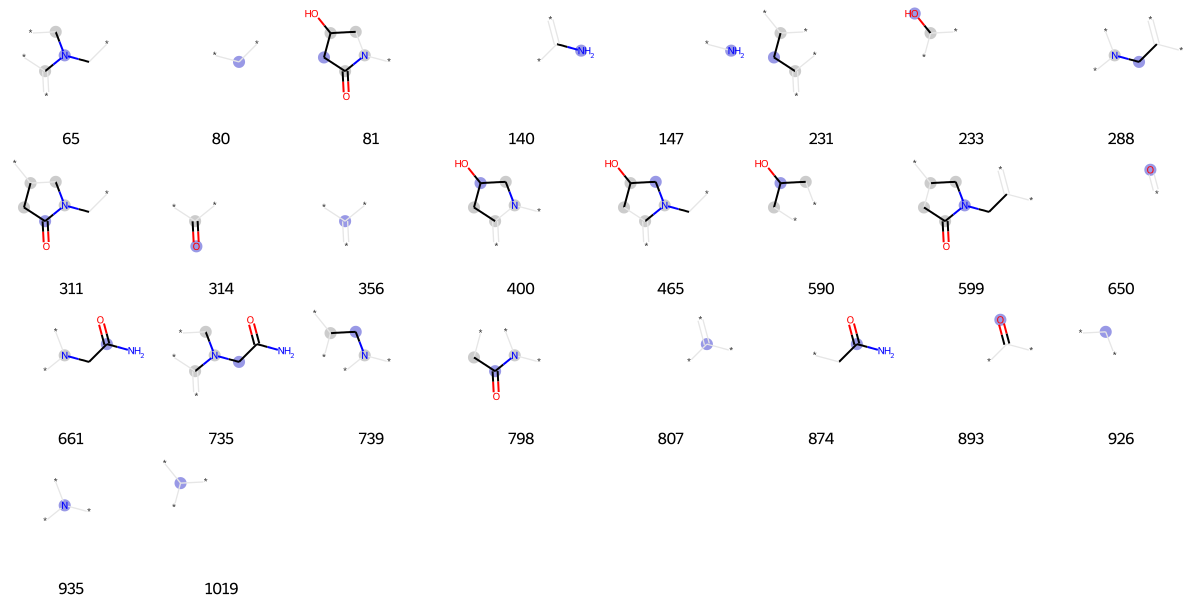

In [1322]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [1323]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 23,
 33,
 61,
 101,
 147,
 217,
 283,
 314,
 333,
 336,
 341,
 349,
 356,
 368,
 378,
 389,
 433,
 435,
 456,
 525,
 572,
 580,
 598,
 650,
 656,
 726,
 780,
 784,
 786,
 807,
 822,
 829,
 831,
 849,
 875,
 893,
 906,
 946,
 967,
 971,
 989]

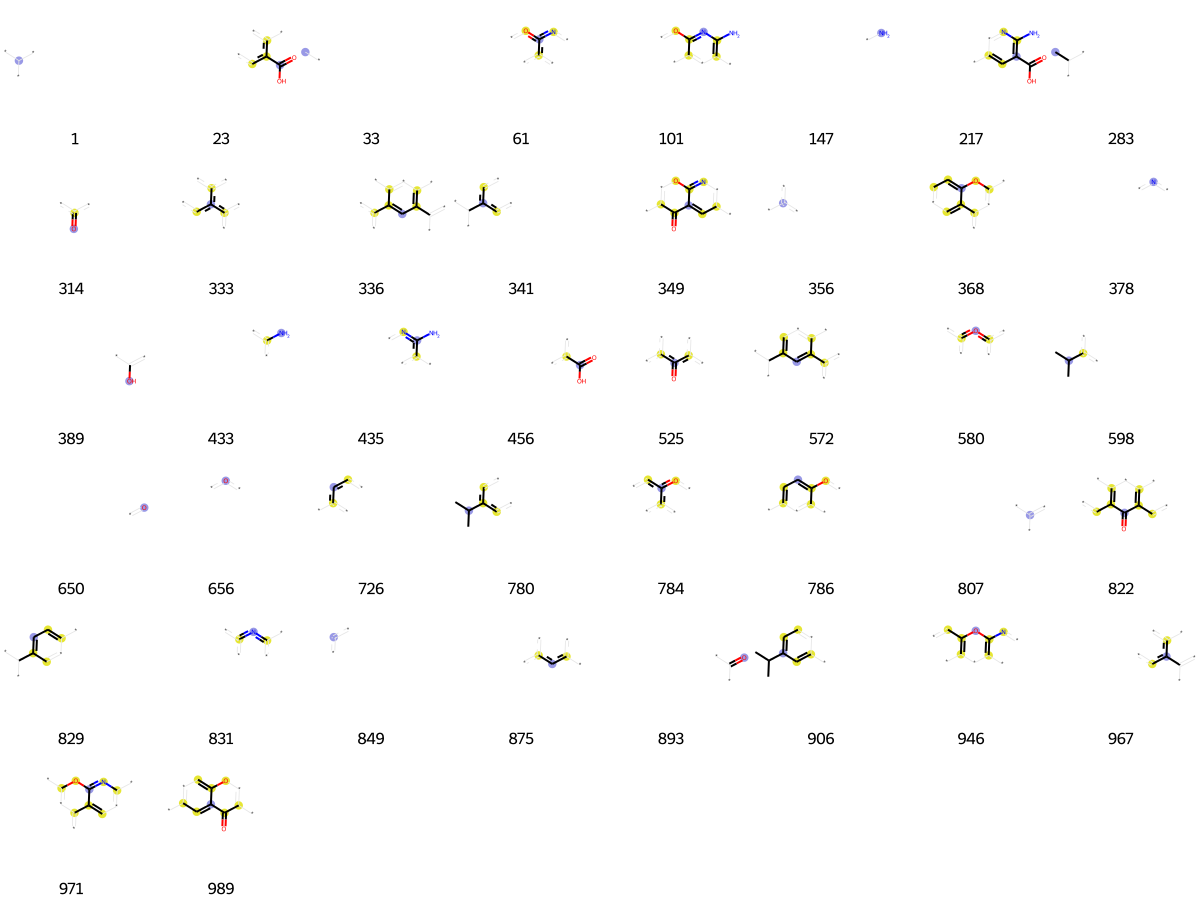

In [1324]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [1325]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[15,
 33,
 52,
 53,
 56,
 64,
 74,
 90,
 119,
 128,
 136,
 147,
 187,
 191,
 200,
 216,
 222,
 235,
 347,
 352,
 356,
 378,
 420,
 433,
 435,
 564,
 568,
 573,
 650,
 698,
 699,
 725,
 726,
 759,
 767,
 792,
 799,
 807,
 816,
 843,
 849,
 875,
 893,
 896,
 904,
 960,
 965,
 966,
 977,
 980,
 984,
 1013]

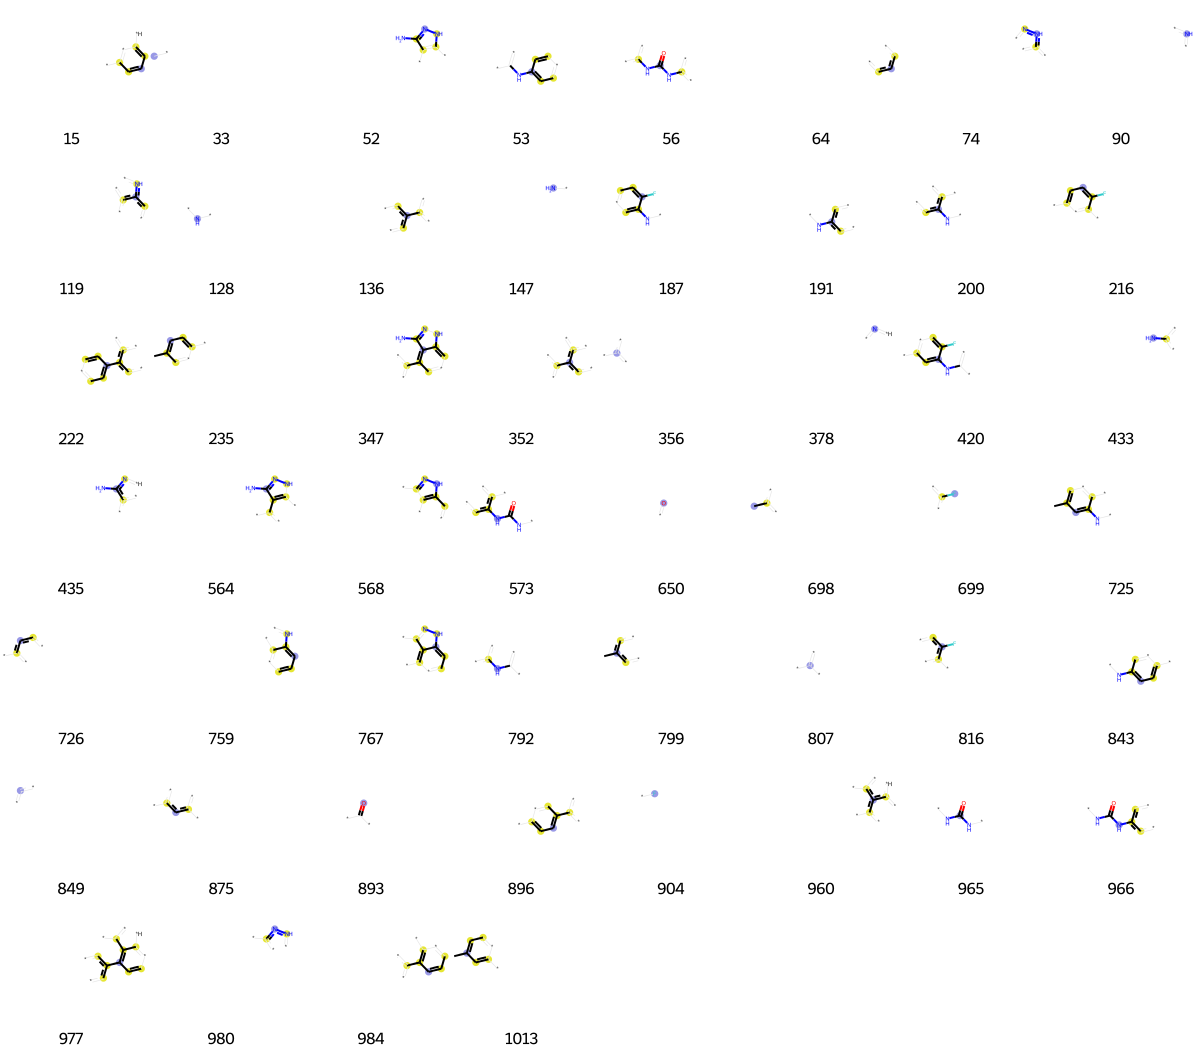

In [1326]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [1327]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[0,
 3,
 4,
 33,
 36,
 45,
 56,
 64,
 74,
 77,
 84,
 90,
 95,
 115,
 128,
 138,
 148,
 158,
 191,
 232,
 250,
 261,
 267,
 299,
 301,
 310,
 356,
 371,
 378,
 380,
 386,
 417,
 428,
 456,
 460,
 491,
 511,
 518,
 526,
 544,
 576,
 617,
 650,
 659,
 673,
 699,
 705,
 708,
 709,
 726,
 729,
 762,
 792,
 802,
 807,
 831,
 843,
 849,
 860,
 875,
 893,
 904,
 910,
 926,
 932,
 934,
 935,
 976,
 980,
 994,
 1018,
 1019,
 1020]

In [1328]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[8,
 19,
 33,
 44,
 54,
 58,
 64,
 80,
 109,
 128,
 139,
 147,
 158,
 175,
 223,
 239,
 323,
 325,
 333,
 356,
 361,
 378,
 388,
 390,
 407,
 428,
 433,
 435,
 448,
 516,
 522,
 538,
 549,
 573,
 603,
 650,
 672,
 687,
 695,
 699,
 726,
 741,
 786,
 803,
 807,
 816,
 831,
 841,
 842,
 849,
 881,
 893,
 902,
 904,
 932,
 935,
 1022]

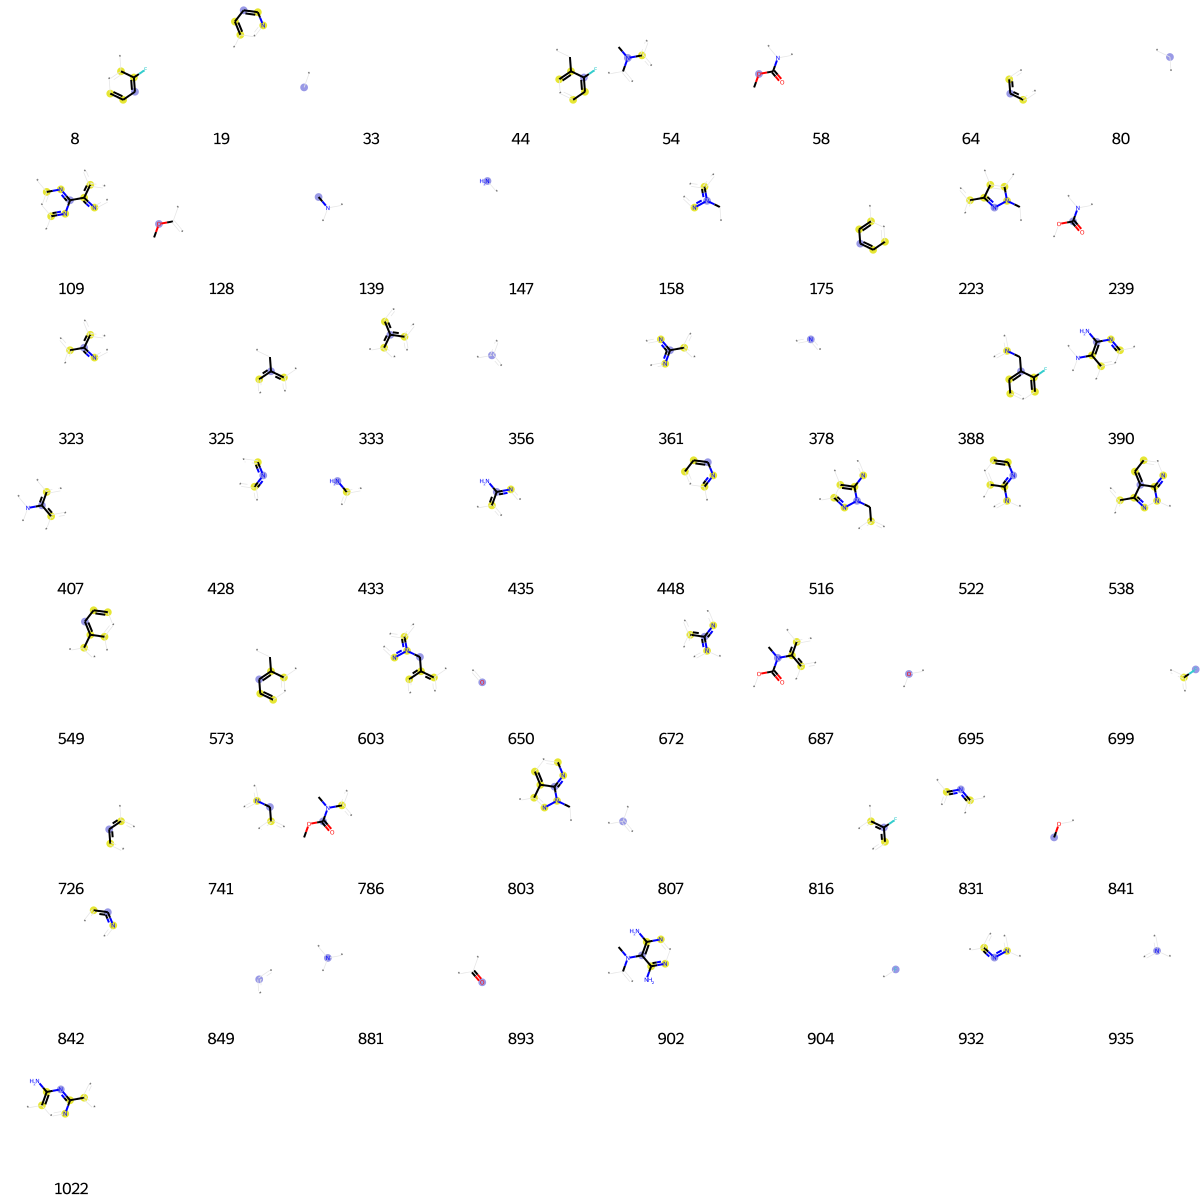

In [1329]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [1330]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[15,
 42,
 63,
 64,
 80,
 175,
 250,
 271,
 280,
 314,
 333,
 335,
 356,
 389,
 418,
 538,
 549,
 591,
 623,
 650,
 659,
 675,
 726,
 727,
 730,
 741,
 771,
 797,
 802,
 831,
 849,
 935,
 972]

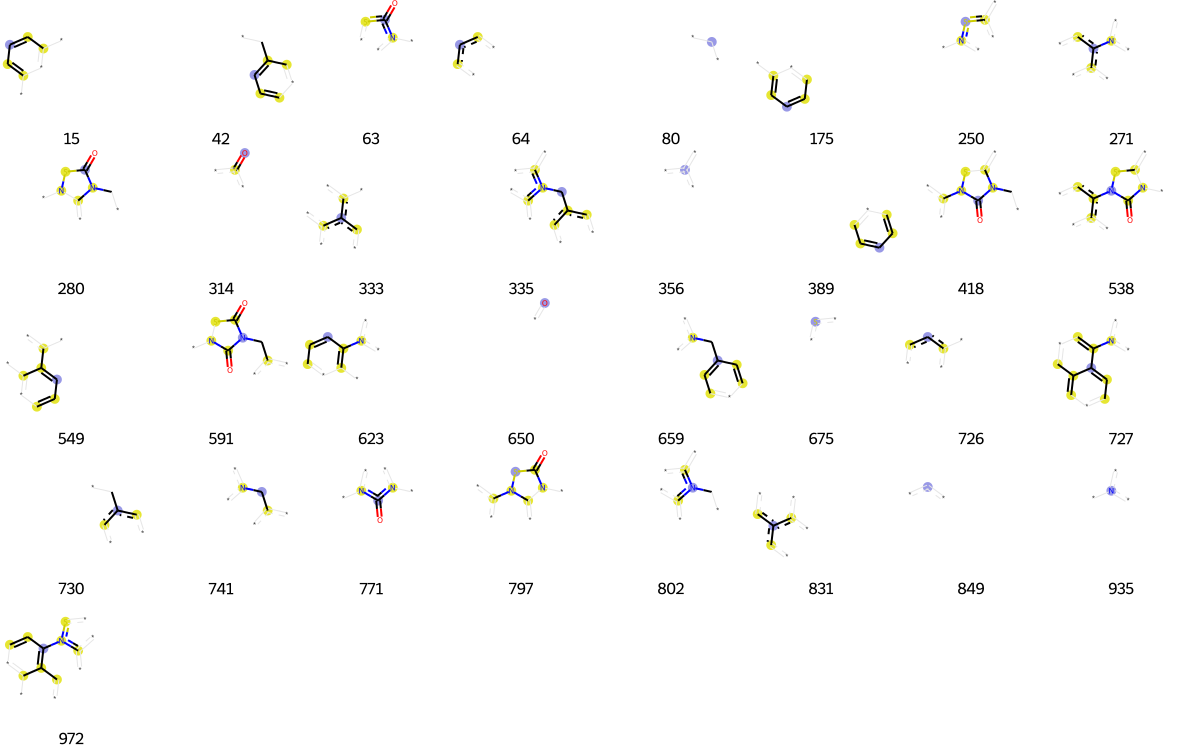

In [1331]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [1332]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[13,
 25,
 80,
 167,
 210,
 222,
 233,
 289,
 299,
 322,
 356,
 392,
 452,
 463,
 466,
 489,
 492,
 524,
 578,
 584,
 610,
 656,
 694,
 695,
 696,
 726,
 740,
 745,
 754,
 807,
 819,
 820,
 835,
 849,
 875,
 878,
 897,
 942,
 953,
 1009,
 1019]

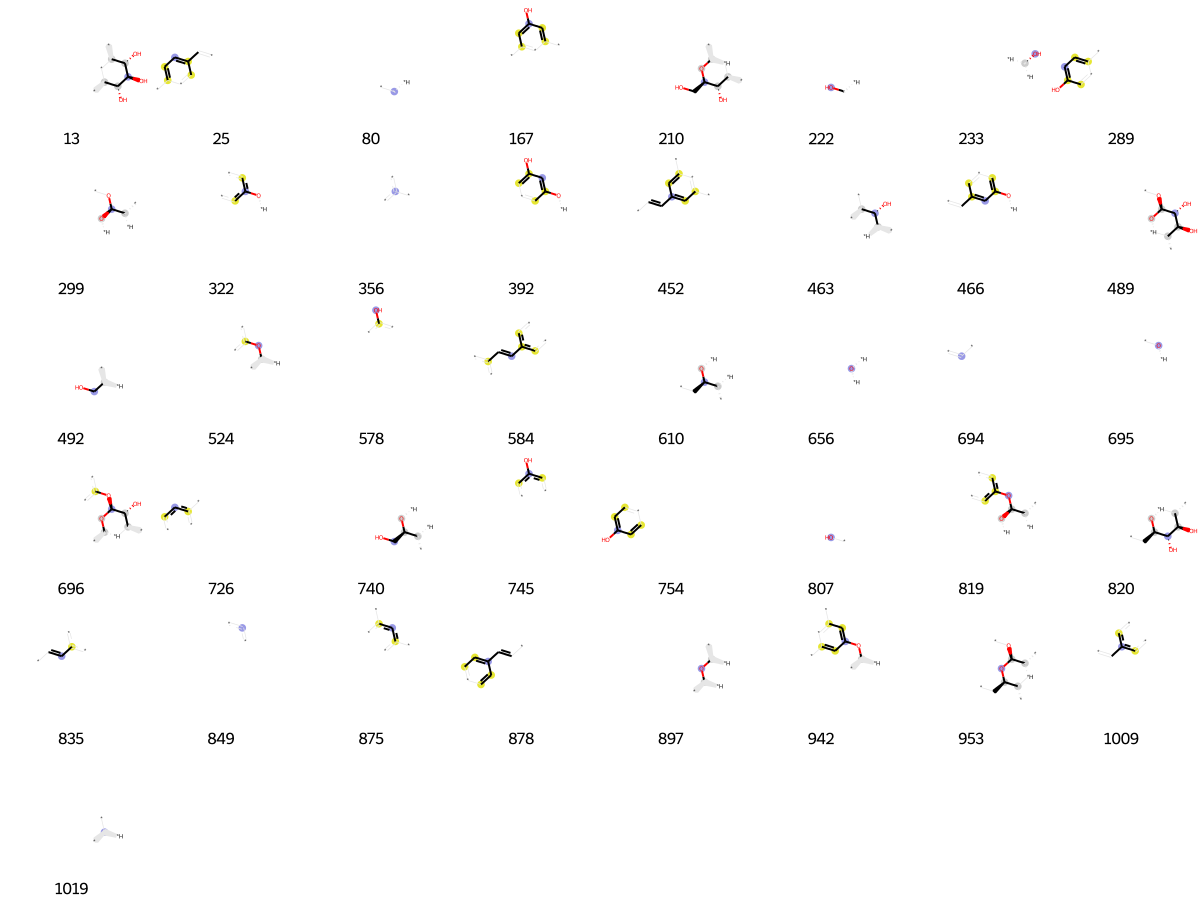

In [1333]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [1334]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[33,
 80,
 270,
 289,
 294,
 356,
 361,
 434,
 571,
 578,
 673,
 688,
 726,
 745,
 754,
 807,
 849,
 898]

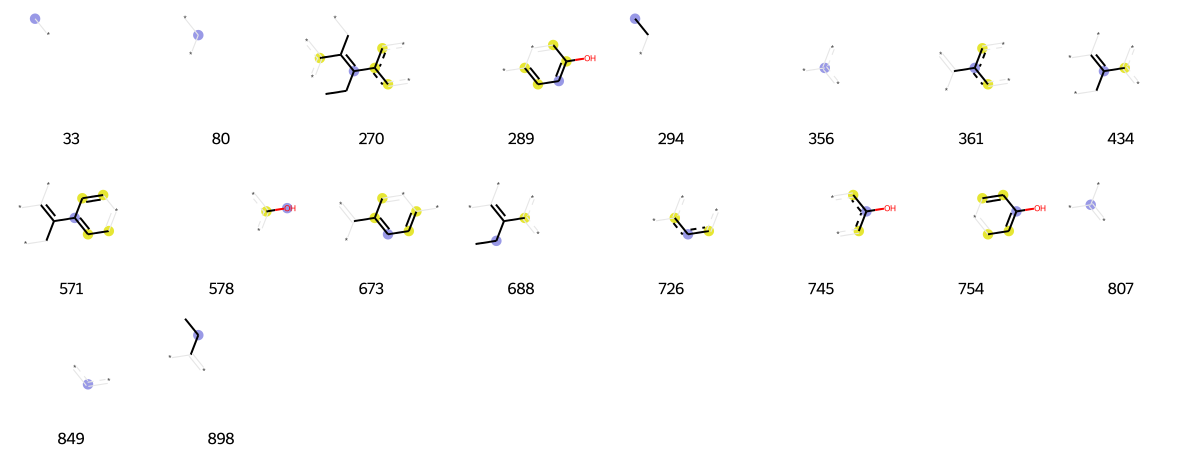

In [1335]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [1336]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[1,
 33,
 283,
 287,
 341,
 356,
 367,
 578,
 583,
 598,
 667,
 698,
 726,
 741,
 760,
 780,
 807,
 829,
 849,
 875,
 906]

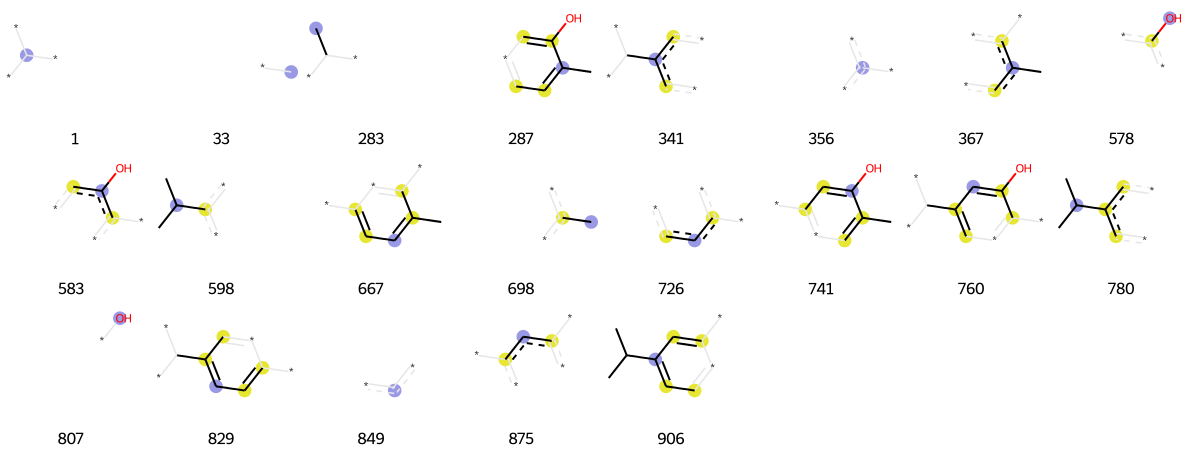

In [1337]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [1338]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[11,
 18,
 33,
 36,
 59,
 61,
 80,
 84,
 118,
 130,
 138,
 147,
 182,
 233,
 242,
 250,
 251,
 262,
 281,
 283,
 301,
 314,
 315,
 356,
 412,
 418,
 479,
 493,
 504,
 519,
 520,
 529,
 580,
 639,
 650,
 679,
 687,
 695,
 714,
 738,
 748,
 760,
 804,
 807,
 841,
 846,
 849,
 893,
 900,
 904,
 926,
 951,
 973,
 980,
 1017,
 1019]

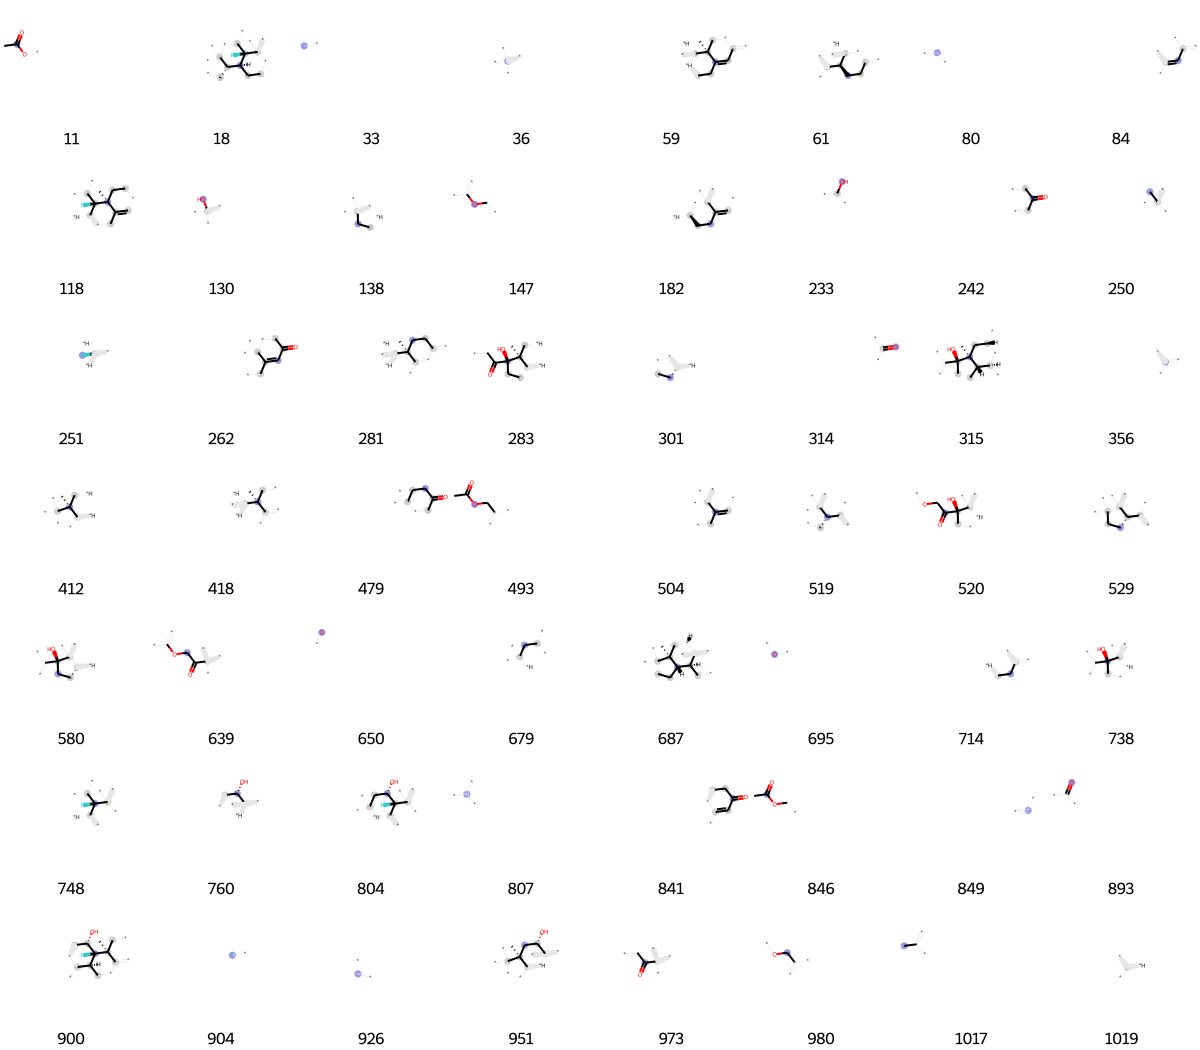

In [1339]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [1340]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[1,
 14,
 33,
 80,
 125,
 128,
 147,
 226,
 231,
 235,
 239,
 245,
 269,
 290,
 294,
 339,
 356,
 387,
 389,
 456,
 481,
 520,
 590,
 644,
 650,
 654,
 695,
 707,
 756,
 786,
 807,
 808,
 849,
 893,
 918,
 926,
 935,
 1006,
 1017,
 1019]

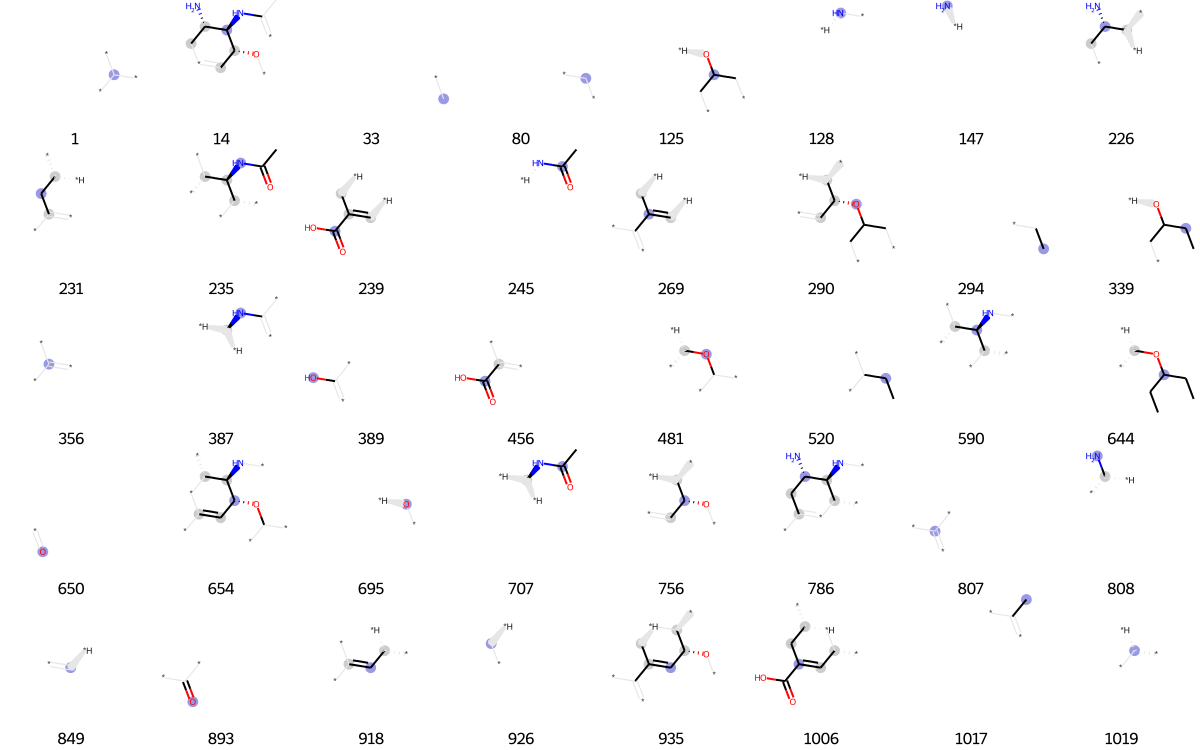

In [1341]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [1342]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 8,
 33,
 57,
 80,
 110,
 114,
 128,
 136,
 197,
 201,
 213,
 263,
 265,
 284,
 315,
 322,
 341,
 356,
 361,
 363,
 366,
 367,
 389,
 392,
 393,
 429,
 486,
 532,
 538,
 540,
 624,
 641,
 650,
 664,
 667,
 673,
 684,
 695,
 698,
 713,
 723,
 726,
 737,
 739,
 751,
 798,
 807,
 829,
 849,
 875,
 887,
 893,
 896,
 904,
 925]

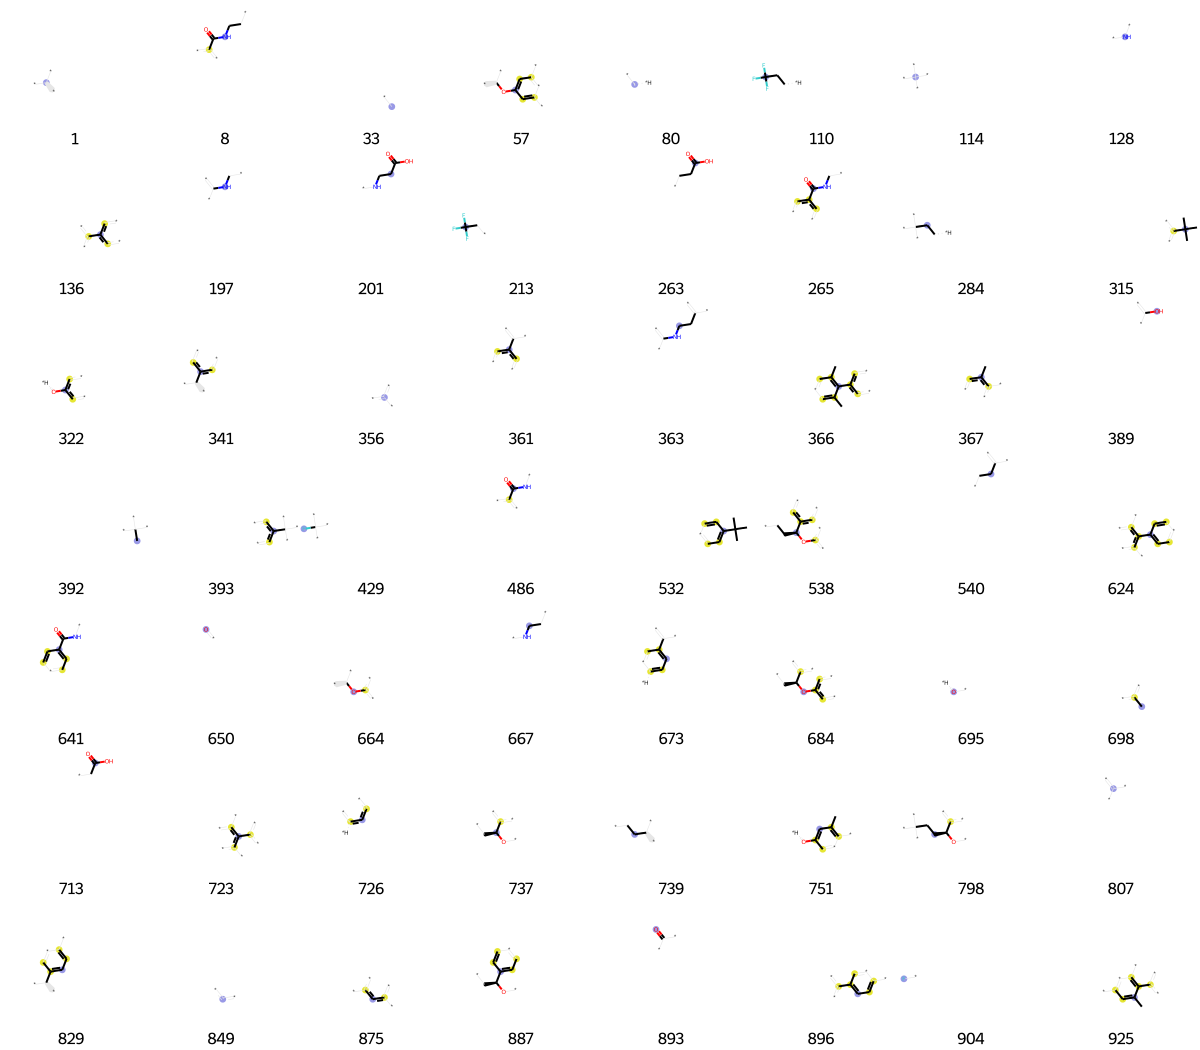

In [1343]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [1344]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 33,
 64,
 73,
 74,
 80,
 90,
 100,
 123,
 136,
 140,
 175,
 186,
 214,
 222,
 283,
 293,
 294,
 310,
 336,
 352,
 356,
 378,
 389,
 412,
 414,
 507,
 540,
 561,
 585,
 591,
 614,
 619,
 650,
 667,
 726,
 730,
 749,
 752,
 794,
 807,
 820,
 837,
 841,
 849,
 873,
 881,
 887,
 893,
 896,
 922,
 926,
 929,
 981,
 984]

In [1345]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 80,
 117,
 147,
 169,
 227,
 266,
 287,
 389,
 496,
 650,
 713,
 807,
 885,
 893,
 981,
 1014]

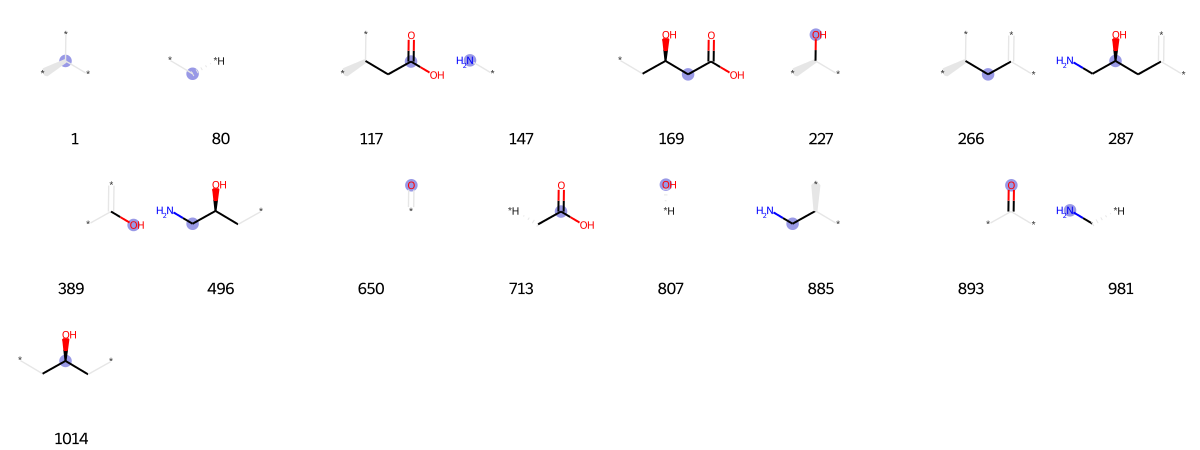

In [1346]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [1347]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[1,
 33,
 79,
 80,
 122,
 128,
 174,
 283,
 310,
 341,
 356,
 439,
 573,
 607,
 650,
 726,
 730,
 807,
 823,
 829,
 849,
 854,
 857,
 878,
 893,
 900,
 955,
 1002]

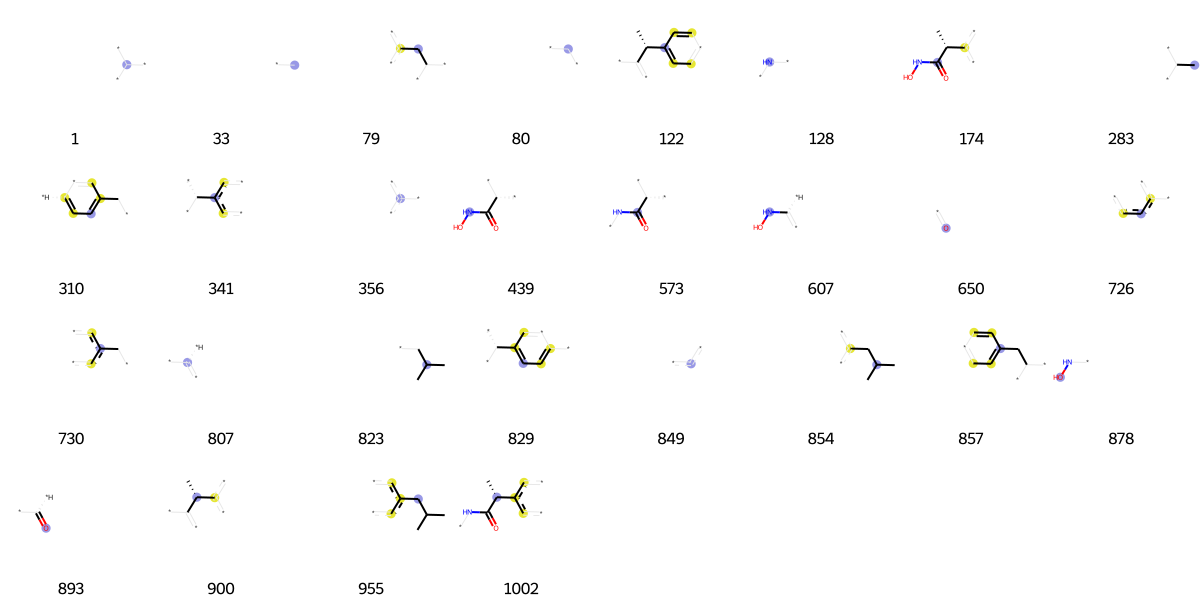

In [1348]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [1349]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[1,
 18,
 20,
 26,
 33,
 79,
 80,
 147,
 180,
 228,
 240,
 275,
 294,
 356,
 389,
 415,
 433,
 520,
 582,
 650,
 661,
 807,
 820,
 849,
 853,
 875,
 893,
 899,
 906,
 912,
 947,
 981,
 1010]

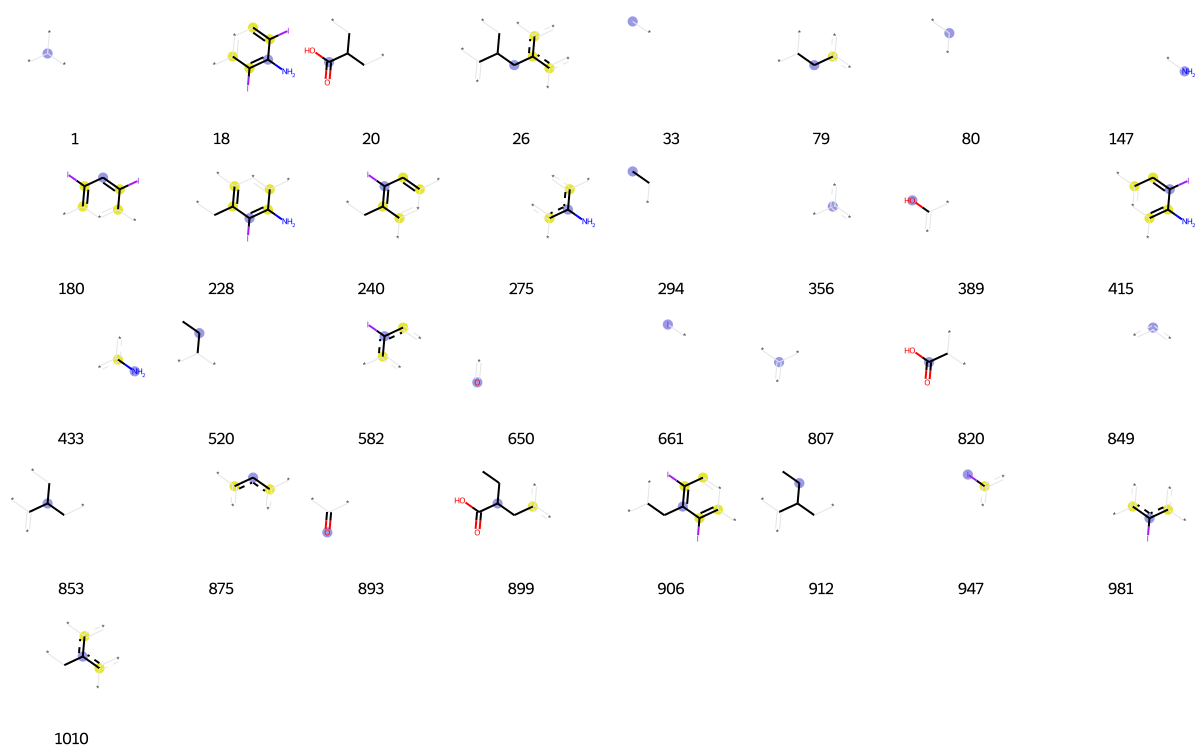

In [1350]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [1351]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[33,
 53,
 79,
 113,
 114,
 128,
 186,
 191,
 236,
 258,
 356,
 360,
 383,
 389,
 393,
 429,
 532,
 641,
 650,
 674,
 681,
 704,
 726,
 745,
 790,
 792,
 803,
 807,
 809,
 843,
 849,
 893,
 904,
 1017]

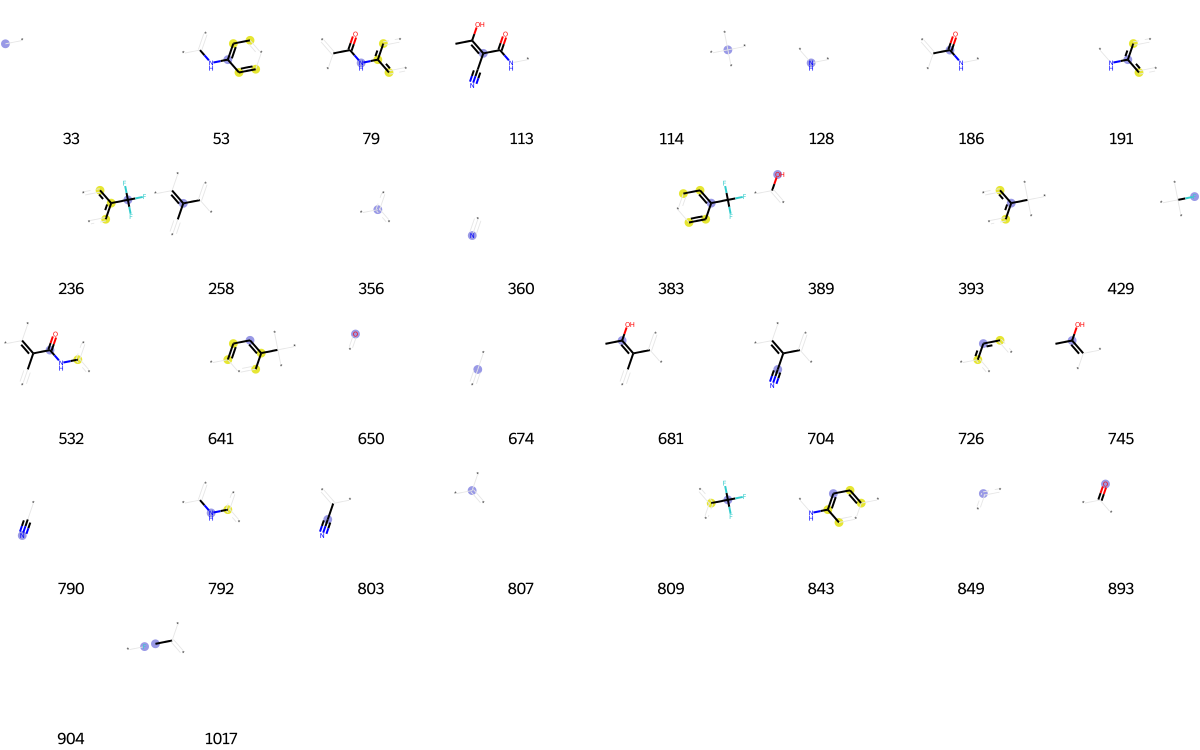

In [1352]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [1353]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[1,
 11,
 15,
 33,
 41,
 64,
 77,
 80,
 127,
 128,
 147,
 184,
 191,
 214,
 222,
 245,
 255,
 260,
 283,
 288,
 294,
 314,
 333,
 338,
 343,
 356,
 386,
 400,
 431,
 441,
 504,
 505,
 549,
 598,
 623,
 650,
 655,
 656,
 664,
 695,
 698,
 701,
 726,
 731,
 738,
 792,
 794,
 807,
 836,
 843,
 849,
 875,
 881,
 893,
 901,
 926,
 931,
 935,
 946,
 950]

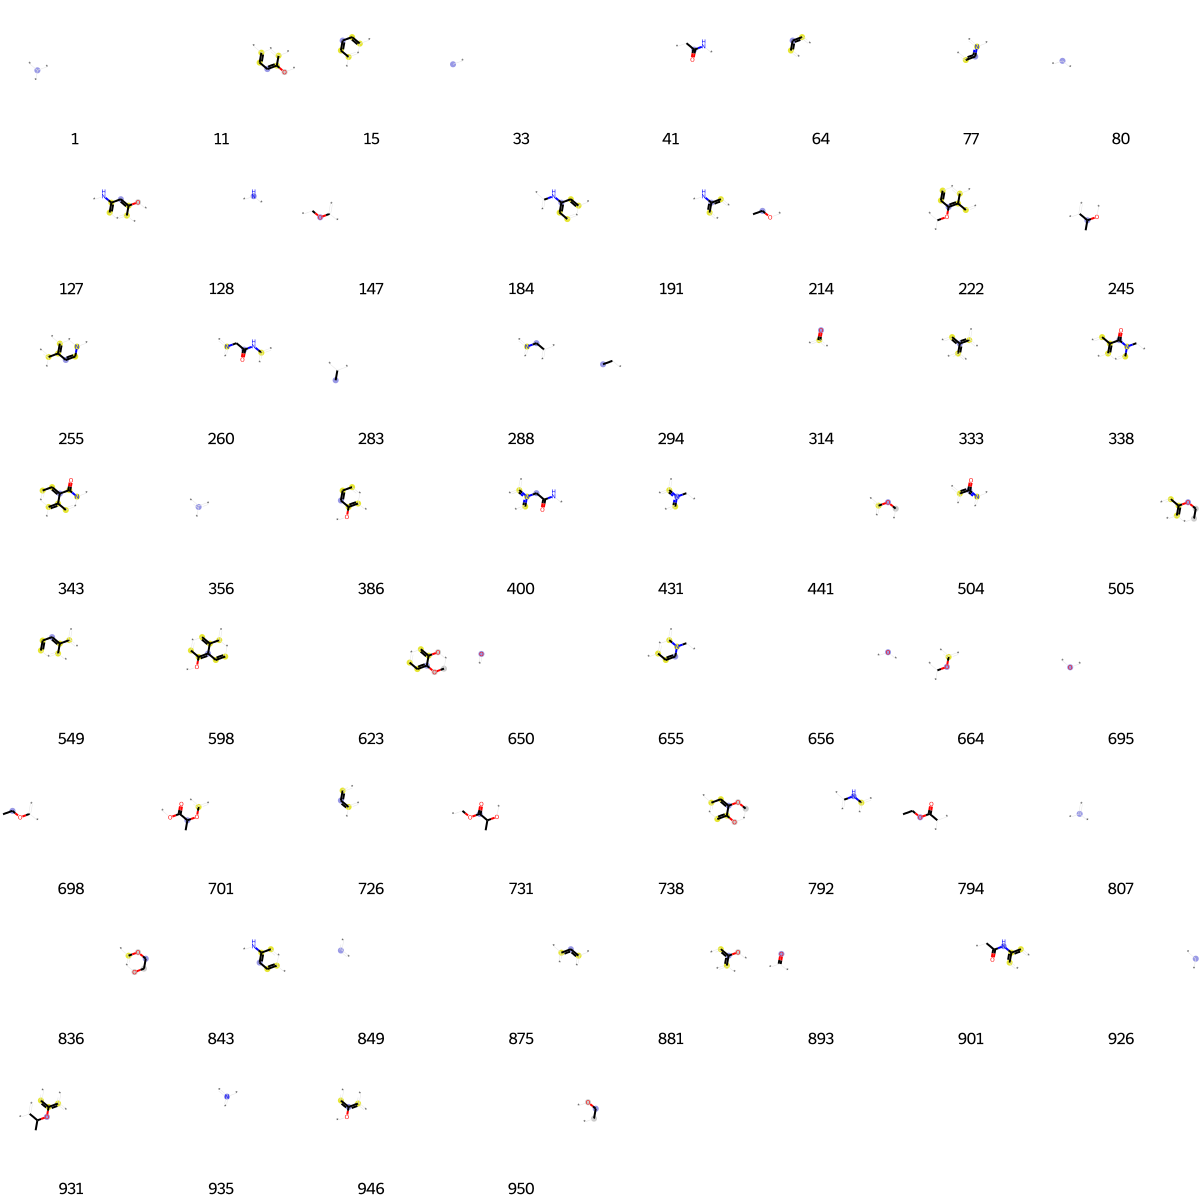

In [1354]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [1355]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[1,
 33,
 64,
 122,
 148,
 175,
 212,
 233,
 267,
 283,
 314,
 341,
 344,
 352,
 356,
 389,
 433,
 650,
 684,
 726,
 752,
 790,
 801,
 807,
 820,
 821,
 829,
 849,
 879,
 893,
 900,
 921,
 922,
 926,
 935,
 984]

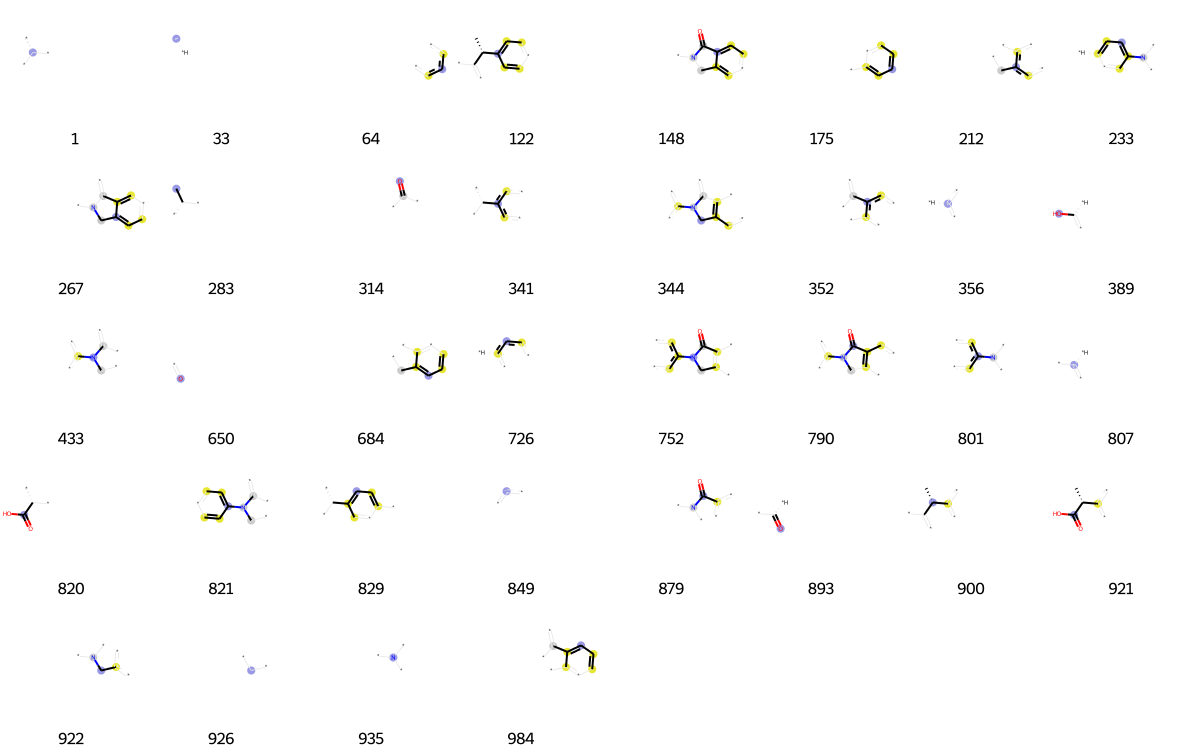

In [1356]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [1357]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[90,
 126,
 133,
 197,
 201,
 284,
 310,
 356,
 380,
 405,
 470,
 480,
 561,
 580,
 585,
 647,
 650,
 656,
 659,
 726,
 728,
 730,
 739,
 807,
 849,
 893,
 921,
 926,
 935,
 978,
 985,
 1014,
 1019]

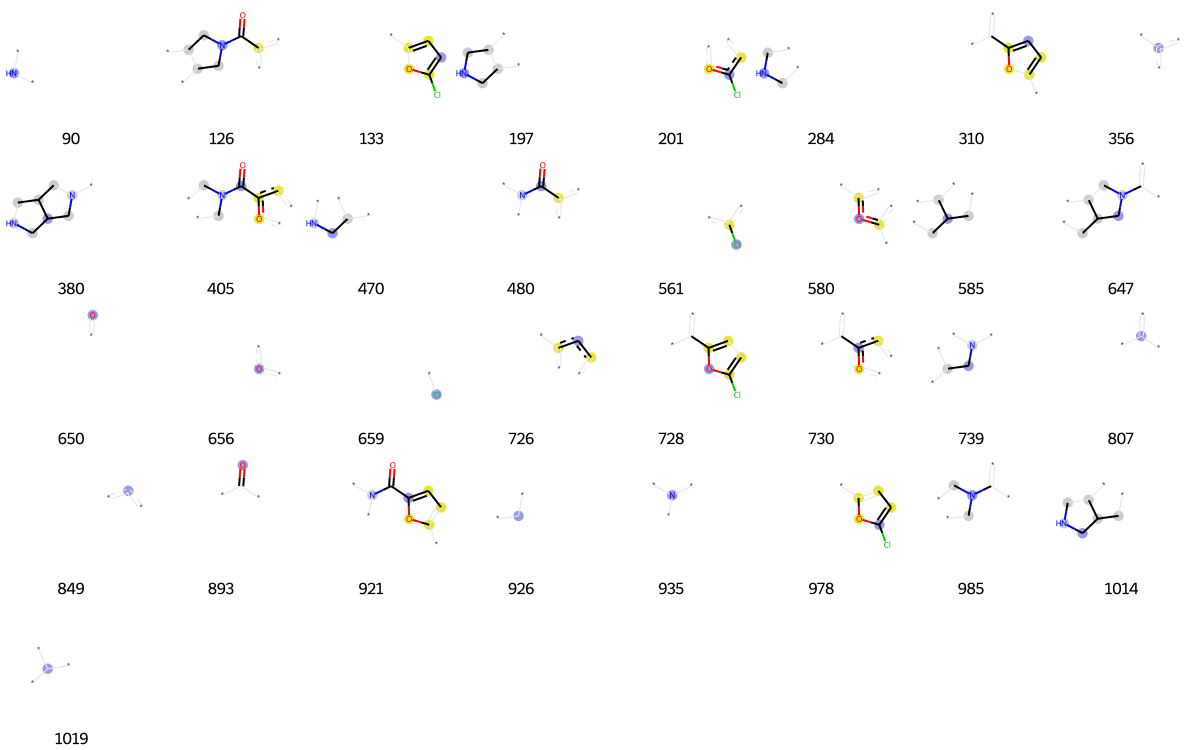

In [1358]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [1359]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[1,
 9,
 33,
 79,
 80,
 283,
 294,
 310,
 341,
 346,
 356,
 389,
 467,
 520,
 601,
 650,
 726,
 730,
 803,
 807,
 820,
 823,
 829,
 849,
 854,
 857,
 893,
 955]

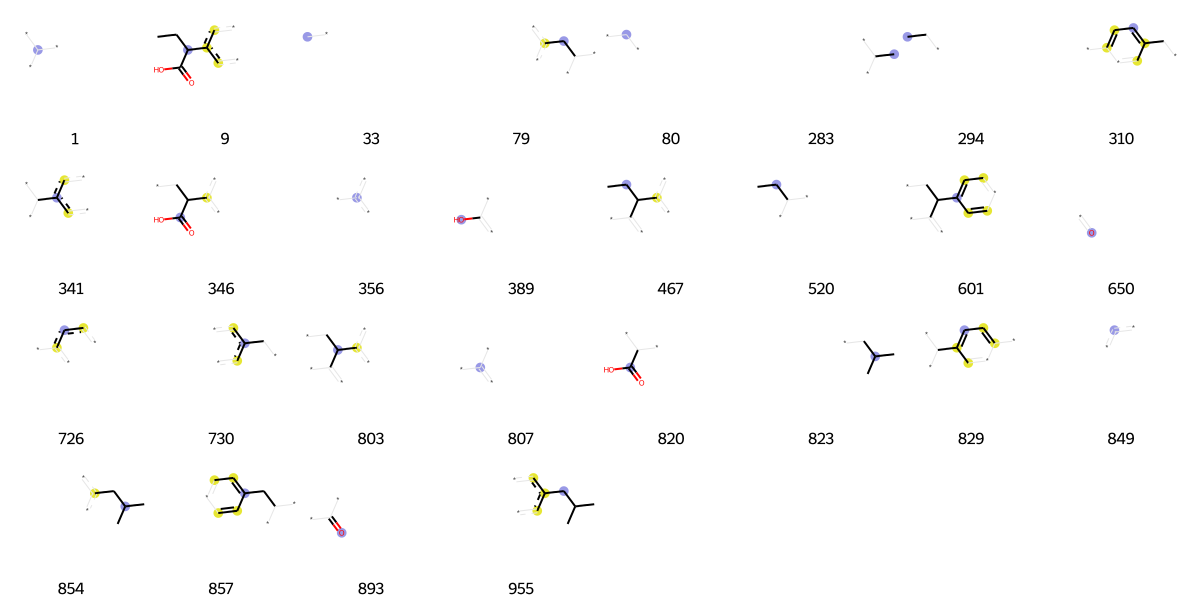

In [1360]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [1361]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 33,
 70,
 80,
 94,
 111,
 114,
 128,
 227,
 270,
 338,
 341,
 343,
 356,
 392,
 406,
 410,
 493,
 518,
 520,
 606,
 632,
 650,
 684,
 695,
 705,
 726,
 807,
 829,
 844,
 849,
 875,
 893,
 934,
 946,
 971]

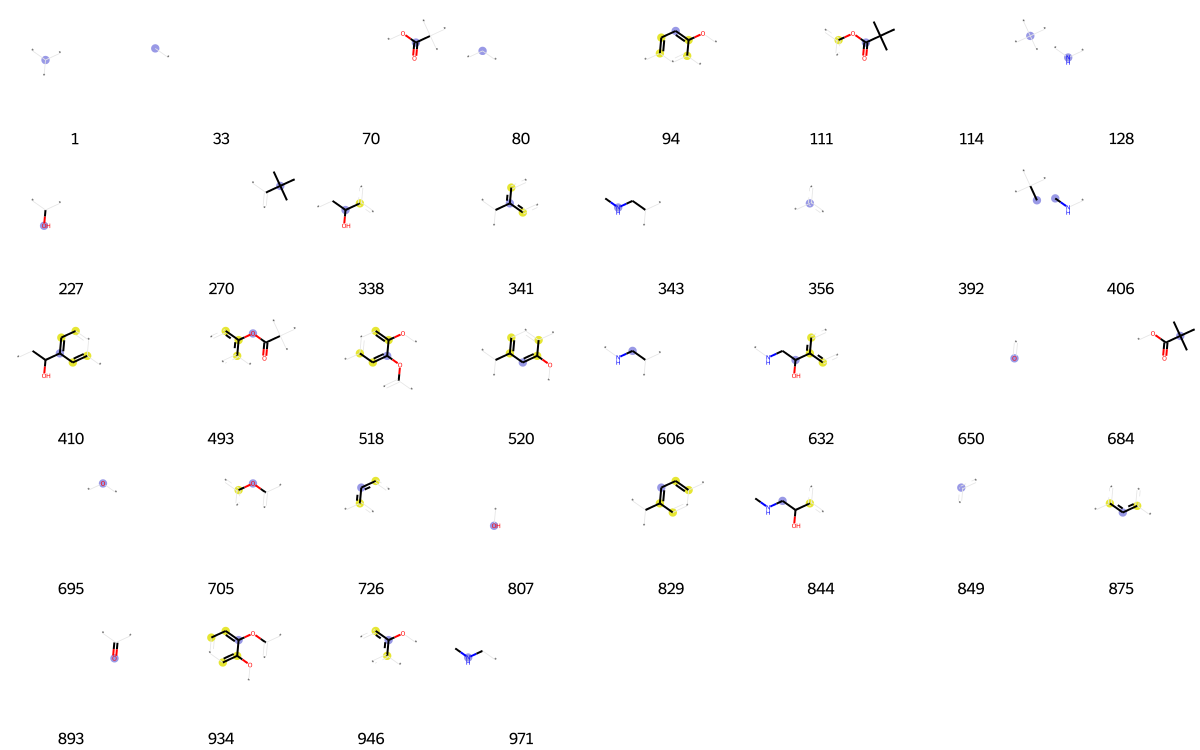

In [1362]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [1363]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[1,
 7,
 14,
 33,
 36,
 42,
 46,
 53,
 59,
 75,
 80,
 104,
 130,
 138,
 149,
 164,
 171,
 179,
 189,
 225,
 233,
 242,
 268,
 271,
 283,
 285,
 294,
 301,
 308,
 314,
 320,
 356,
 357,
 368,
 383,
 429,
 439,
 463,
 485,
 497,
 504,
 520,
 525,
 526,
 550,
 551,
 583,
 595,
 598,
 609,
 621,
 647,
 650,
 656,
 669,
 671,
 674,
 679,
 681,
 684,
 687,
 695,
 698,
 710,
 722,
 731,
 739,
 745,
 750,
 757,
 772,
 798,
 801,
 802,
 807,
 815,
 827,
 828,
 835,
 841,
 849,
 855,
 859,
 862,
 883,
 897,
 918,
 922,
 926,
 931,
 933,
 937,
 941,
 964,
 982,
 1019,
 1020]

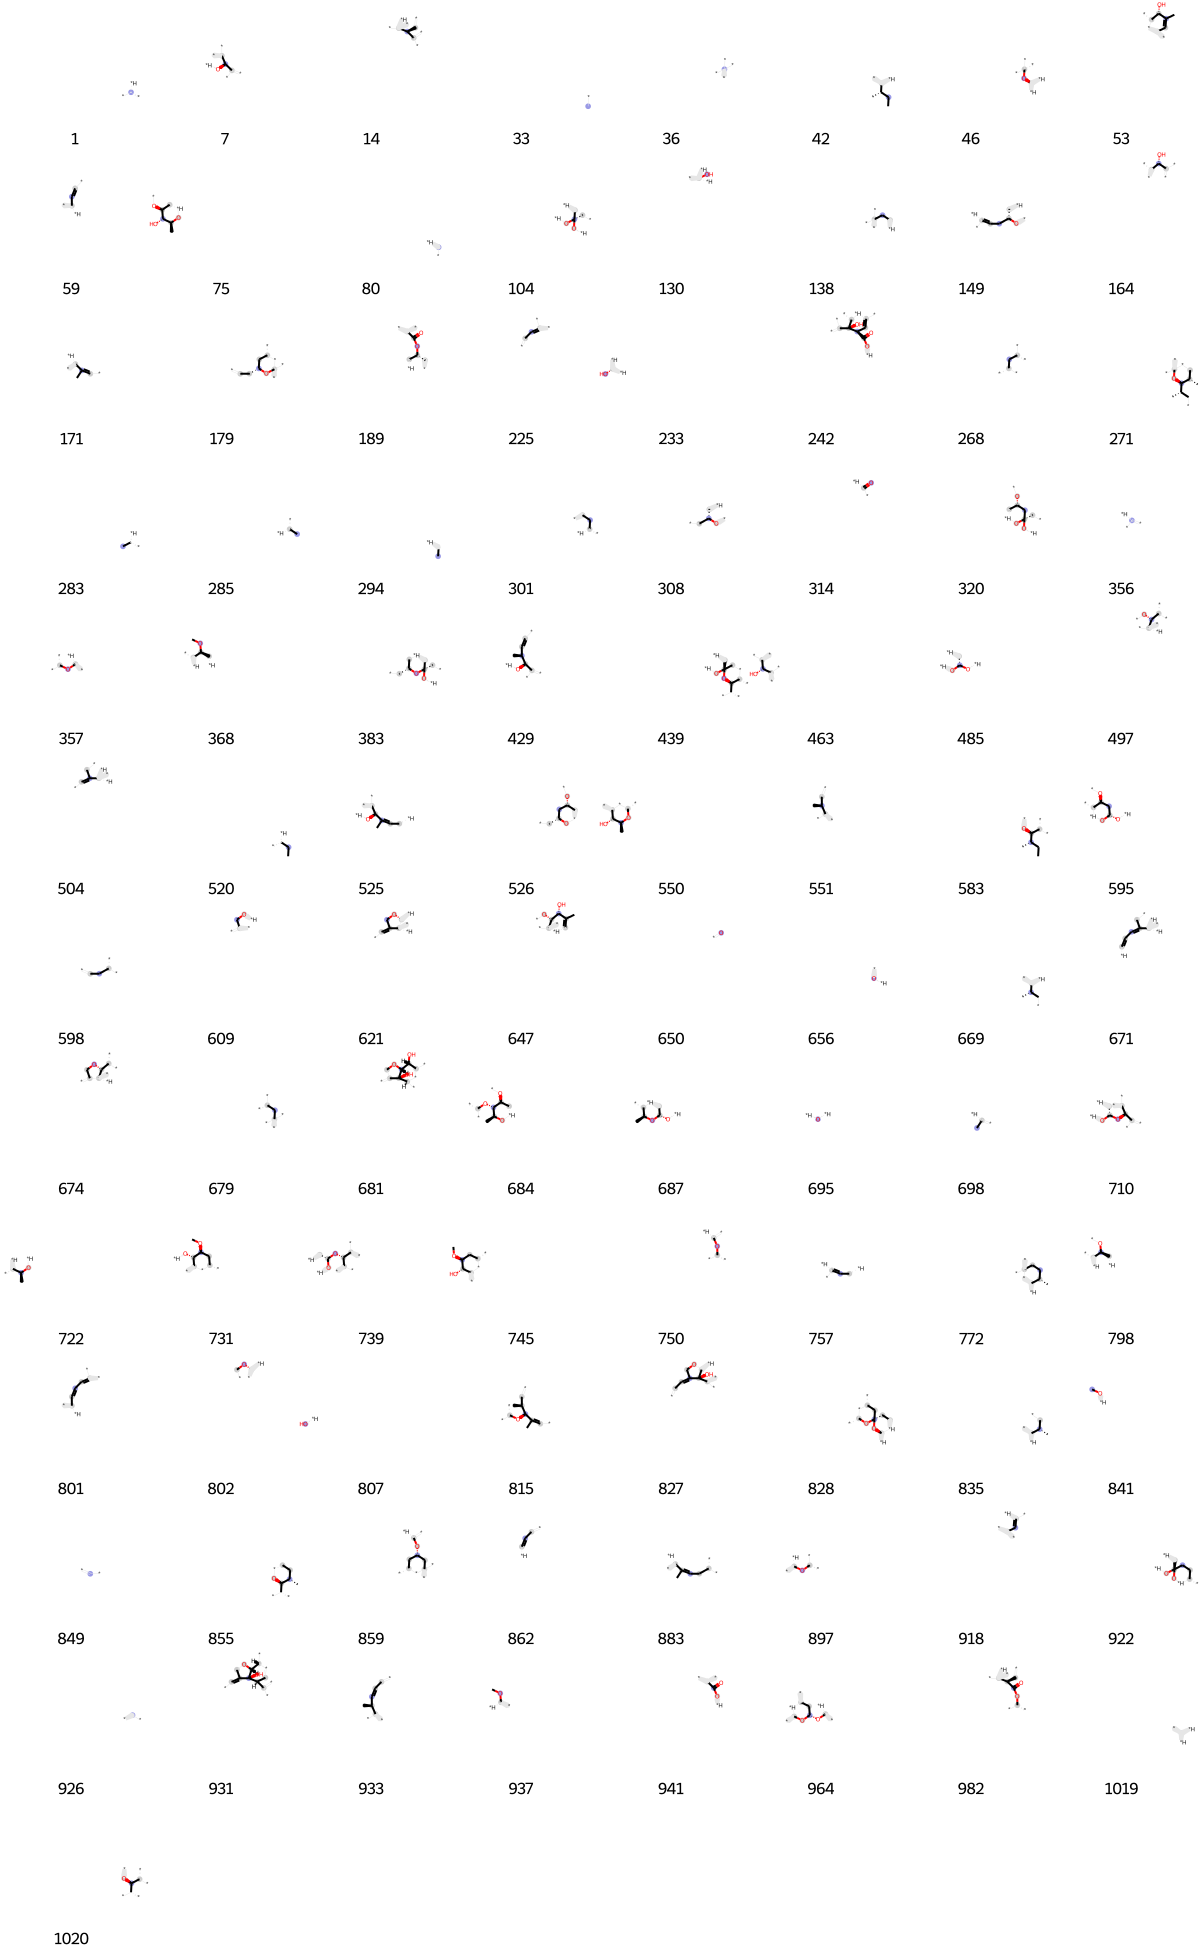

In [1364]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [1365]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 33,
 64,
 80,
 110,
 139,
 143,
 175,
 216,
 227,
 271,
 283,
 356,
 387,
 389,
 397,
 561,
 588,
 599,
 605,
 623,
 650,
 652,
 675,
 715,
 726,
 737,
 738,
 807,
 820,
 836,
 849,
 881,
 893,
 898,
 917,
 935,
 939,
 949,
 1020]

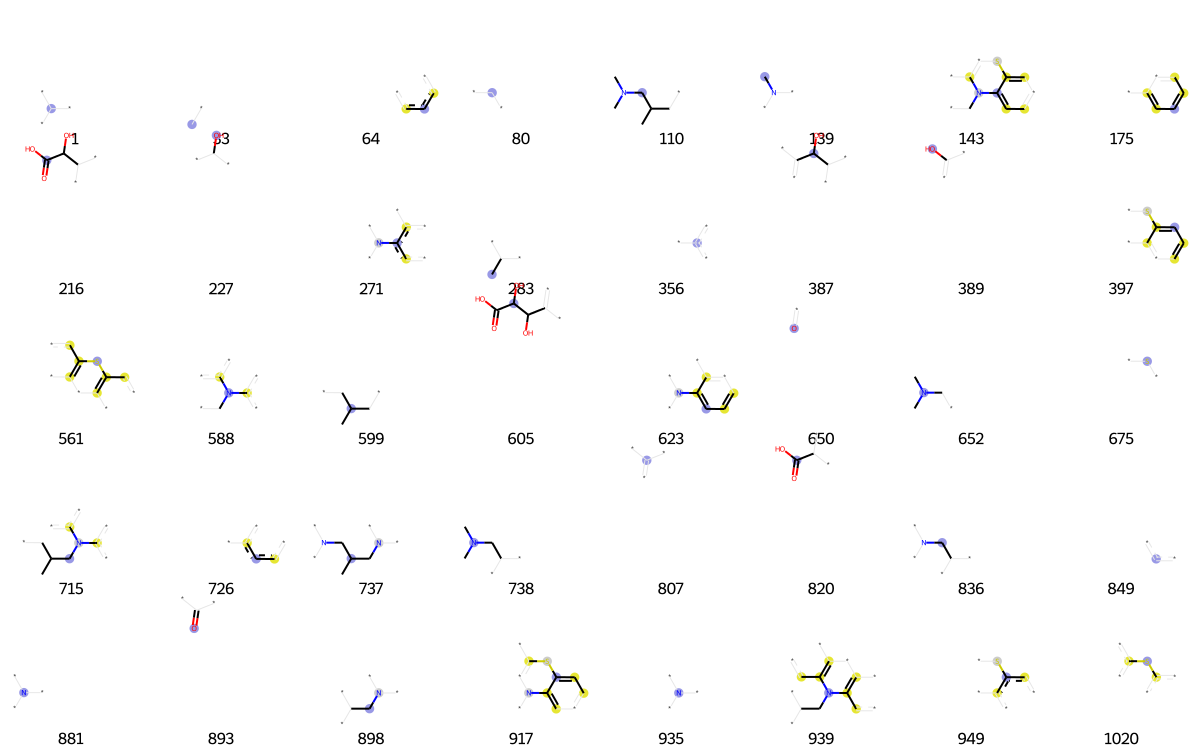

In [1366]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])